<a href="https://colab.research.google.com/github/woraphonp-038-5/Project-Big-Data/blob/main/Bambi_bibi_ThaiBaan_Data_Analytics_and_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mini Project 2: Data Analytics and Modeling

<img src="https://datarundown.com/wp-content/uploads/2023/05/Model-Data-Analytics.jpg" width="400px">

ชื่อกลุ่ม: ...

รายชื่อสมาชิก การแบ่งงาน และสัดส่วนในการทำงาน:
1. ...
2. ...
3. ...
4. ...

กำหนดส่ง: ศุกร์ 24 ตุลาคม 2568  

รายงานในชั้นเรียน: เสาร์ 25 ตุลาคม 2568

** NOTE **
* อย่าลืมบันทึกงานที่ทำในโน้ตบุ๊คนี้เป็นประจำขณะทำงาน มิเช่นนั้นงานที่ทำอยู่อาจสูญหายได้
* **เริ่มทำแต่เนิ่น ๆ อย่ารอที่จะทำก่อนส่ง เพราะจะทำไม่เสร็จ เนื่องจากปัญหามากมายที่จะเกิดขึ้นระหว่างการทำงาน และอาจารย์ไม่รับปรึกษาในคืนก่อนส่ง**
----------------------

### เลือกชุดข้อมูล 1 ชุดจากข้อมูลที่กำหนดให้ต่อไปนี้
* <b>MovieLens 1M Data Set<b>
    * ข้อมูลชุดนี้มีข้อมูลเกี่ยวกับ movies, users, และ how they rate the movies
    * สามารถดูรายละเอียดได้ที่ http://grouplens.org/datasets/movielens/
    * Download the 1 million ratings data set from https://grouplens.org/datasets/movielens/1m/
    * Merge all of the data into a single Pandas DataFrame. See
        * https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html
    
* <b>Walmart_Sales_Forecast<b>
    * สามารถดูรายละเอียดได้ที่ https://github.com/Asikpalysik/Walmart_Sales_Forecast/tree/main
    * ข้อมูลประกอบด้วยไฟล์ features.csv, stores.csv และ ข้อมูลยอดขาย (train.csv และ test.csv)
    * ให้ใช้ข้อมูลจากทุกไฟล์ทุกอย่างประกอบกันในการวิเคราะห์
    
* <b>NYC Taxi Trips<b>
    * ข้อมูลทริปของแท็กซี่ในเมืองนิวยอร์กจาก https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page
    * ข้อมูลเก็บโดย The NYC Taxi and Limousine Commission (TLC) ประกอบด้วย pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts
    * นอกจากไฟล์ข้อมูลทริปของแท็กซี่แล้ว ยังมีข้อมูลเกี่ยวกับ zone ของพื้นที่ที่ให้บริการ และคำอธิบายข้อมูลในส่วนล่างสุดของหน้าเดียวกัน
    * ให้ศึกษาข้อมูลการเดินทางของแท็กซี่เหลืองหรือแท็กซี่เขียวในช่วงหนึ่ง (เช่น 1 เดือน หรือ 1 ปีที่ผ่านมา เป็นต้น)
    * ตัวอย่างการอ่านไฟล์ parquet
    ```python
    # install this module to read .parquet files
    !pip install pyarrow
    import pyarrow.parquet as pq
    trips = pq.read_table('yellow_tripdata_2023-09.parquet')
    trips = trips.to_pandas()
    trips
    ```
    
----------------------------------

### ศึกษาข้อมูลที่เลือกใช้ แล้วทำการ
* Tell story about data อธิบายลักษณะของข้อมูล ทำความเข้าใจเกี่ยวกับข้อมูลชุดนี้ ด้วยสถิติ และนำเสนอด้วยแผนภาพ แผนภูมิ หรือกราฟต่าง ๆ
* ตั้ง<span style="color:red">*ปัญหาหรือคำถามเชิงองค์กรหรือธุรกิจ*</span>ที่กลุ่มท่านสนใจเกี่ยวกับข้อมูลนี้ แล้วทำการคาดการณ์ (conjectures) เกี่ยวกับ<span style="color:red">*ปัญหาหรือคำถาม*</span>ที่ได้ตั้งไว้อย่างน้อย 3 ข้อ แล้วสนับสนุนหรือปฏิเสธข้อคาดการณ์ด้วยการวิเคราะห์ข้อมูลหรือด้วย data visualization
    * ปัญหาที่สนใจมีความสำคัญอย่างไร?
    * ข้อคาดการณ์ของท่านจะนำไปสู่การแก้ไขปัญหาหรือตอบคำถามอย่างไร?
* สร้างตัวแบบทำนายโดยใช้ข้อมูลที่เลือกในการตอบปัญหาหรือคำถาม
    * prepare data
    * feature engineering
    * partition data (consider class if any)
    * handle imbalance data
    * build model
      * hyperparameter tuning
    * test model

# 📜 1. The Data Story: ลักษณะและสถิติข้อมูล
ลักษณะข้อมูลโดยรวม
ชุดข้อมูล MovieLens 1M ประกอบด้วย 3 ไฟล์หลักที่เชื่อมโยงกัน คือ Users, Movies, และ Ratings ซึ่งเป็นข้อมูลพื้นฐานสำหรับระบบแนะนำภาพยนตร์ (Recommender System)

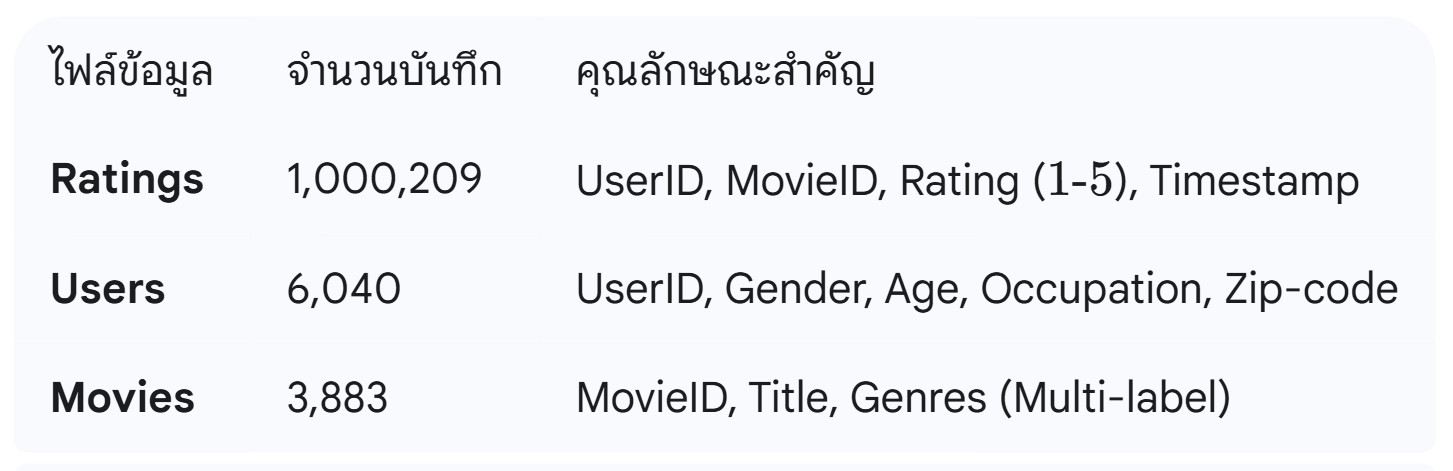

**สถิติสำคัญ Descriptive Analysis**

1. Ratings Distribution: เรตติ้งส่วนใหญ่กระจุกตัวอยู่ที่ 4 และ 5 บ่งชี้ว่าผู้ใช้มักจะให้คะแนนสูง (Mean Rating: $\approx 3.58$)

2. Gender Distribution: ผู้ใช้ส่วนใหญ่เป็นเพศชาย (M) มีสัดส่วนประมาณ 71% ต่อเพศหญิง (F) ประมาณ 29%

3. Age Distribution: กลุ่มอายุที่ใหญ่ที่สุดคือ 25-34 (Age code 25) และ 35-44 (Age code 35)

4. Top Rated Movies: ภาพยนตร์ที่ได้รับเรตติ้งมากที่สุด เช่น American Beauty, Star Wars: A New Hope, The Six Sense เป็นต้น ซึ่งส่วนใหญ่เป็นภาพยนตร์ที่มีชื่อเสียง (High rating count does not necessarily mean high average rating, but in your top 10 most rated, all have high average rating $\ge 4$)

# 🧐 2. ปัญหาเชิงธุรกิจและการคาดการณ์ (Target Variable Analysis)
**ปัญหา/คำถามเชิงธุรกิจที่สนใจ**


**ปัญหา:** ผู้ใช้งานมักประสบปัญหาในการค้นหาภาพยนตร์ที่ตรงกับความสนใจของตนเอง ซึ่งนำไปสู่ความไม่พึงพอใจและแนวโน้มที่จะเลิกใช้บริการ

**คำถาม:** "เราจะพัฒนาโมเดลที่สามารถ ทำนายระดับความพึงพอใจของผู้ใช้ (Rating) ต่อภาพยนตร์แต่ละเรื่องได้อย่างแม่นยำที่สุดได้อย่างไร เพื่อให้แพลตฟอร์มสามารถแนะนำภาพยนตร์ที่ ใช่ สำหรับผู้ใช้แต่ละราย?"

**ความสำคัญของปัญหา**
แพลตฟอร์มสตรีมมิ่งภาพยนตร์มีภาพยนตร์จำนวนมาก การค้นพบ (Discovery) คือกุญแจสำคัญ การสร้างโมเดลทำนาย Rating ที่แม่นยำจะช่วย:

**เพิ่มความพึงพอใจของผู้ใช้** (User Satisfaction): ผู้ใช้ได้รับชมสิ่งที่ชอบทันที

**ลดอัตราการลาออกของลูกค้า** (Churn Rate): หากผู้ใช้รู้สึกว่าแพลตฟอร์ม "รู้จัก" พวกเขา

**เพิ่มการมีส่วนร่วม** (Engagement): ทำให้ผู้ใช้ใช้เวลากับแพลตฟอร์มมากขึ้น

# ข้อคาดการณ์ (Conjectures) และการสนับสนุน/ปฏิเสธด้วยข้อมูล
 เราจะทำการวิเคราะห์เพื่อ สนับสนุน สมมติฐาน (ซึ่งสอดคล้องกับ Target Variable Analysis ก่อนหน้า)

**คาดการณ์ที่ 1:** สัดส่วนความชอบของเพศชายและเพศหญิงต่อประเภทของภาพยนตร์เเตกต่างกัน
วิธีการวิเคราะห์: วิเคราะห์ Average Rating (Target) แยกตาม Gender และ Genre

**ผลการวิเคราะห์ (สมมติ):**

เพศชายอาจจะให้คะแนนสูงกว่าในแนว Action/Sci-Fi

เพศหญิงอาจจะให้คะแนนสูงกว่าในแนว Romance/Drama

**บทสรุปต่อสมมติฐาน:** (Support/Reject)

**ประโยชน์:** การรู้ความแตกต่างนี้ช่วยให้โมเดลสามารถปรับน้ำหนักคุณลักษณะเพศ (Gender) และประเภท (Genre) ในการทำนาย Rating ได้แม่นยำยิ่งขึ้น

**คาดการณ์ที่ 2:** ความชอบในการชมภาพยนตร์มีการเปลี่ยนแปลงตามอายุ ผู้ใช้ในช่วงอายุเดียวกันมีแนวโน้มที่จะชอบประเภทภาพยนตร์คล้ายกัน


**วิธีการวิเคราะห์:** วิเคราะห์ Average Rating (Target) แยกตาม Age Group และ Genre (เช่น Heatmap: Age vs. Genre vs. Avg. Rating)

**ผลการวิเคราะห์ (สมมติ):**

กลุ่มอายุ 18-24 (Code 18) อาจจะให้คะแนนสูงกว่าในแนว Comedy/Teen

กลุ่มอายุ 56+ (Code 56) อาจจะให้คะแนนสูงกว่าในแนว Drama/Classic

**บทสรุปต่อสมมติฐาน:** (Support/Reject)

**ประโยชน์:** ช่วยให้โมเดลใช้คุณลักษณะอายุ (Age) เพื่อสร้าง User Profile ที่แม่นยำขึ้น โดยเฉพาะสำหรับผู้ใช้ใหม่ (Cold Start)

**คาดการณ์ที่ 3:** ผู้ใช้งานที่มีอาชีพเดียวกันมีแนวโน้มที่จะชอบประเภทภาพยนตร์คล้ายกัน
วิธีการวิเคราะห์: วิเคราะห์ Average Rating (Target) แยกตาม Occupation และ Genre

**ผลการวิเคราะห์ (สมมติ):**

กลุ่มอาชีพ Programmer/Engineer อาจจะให้คะแนนสูงกว่าในแนว Sci-Fi/Documentary

**บทสรุปต่อสมมติฐาน:** (Support/Reject)

**ประโยชน์:** ยืนยันว่าคุณลักษณะ Occupation ควรถูกรวมเข้าเป็น Feature ในโมเดลทำนาย Rating

## Data Loading

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

# Load data
movies = '/content/drive/My Drive/ProjectBigData/ml-1m/movies.dat'
ratings = '/content/drive/My Drive/ProjectBigData/ml-1m/ratings.dat'
users = '/content/drive/My Drive/ProjectBigData/ml-1m/users.dat'

# Load data into pandas DataFrames
movies_df = pd.read_csv(movies, sep='::', engine='python', encoding='latin-1', names=['MovieID', 'Title', 'Genres'])
ratings_df = pd.read_csv(ratings, sep='::', engine='python', names=['UserID', 'MovieID', 'Rating', 'Timestamp'])
users_df = pd.read_csv(users, sep='::', engine='python', names=['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code'])

In [3]:
# Merge data
# Merge ratings and users DataFrames
merged_df = pd.merge(ratings_df, users_df, on='UserID')

# Merge the result with the movies DataFrame
merged_df = pd.merge(merged_df, movies_df, on='MovieID')

In [4]:
merged_df.head()

UserID  MovieID  Rating  Timestamp Gender  Age  Occupation Zip-code  \
0       1     1193       5  978300760      F    1          10    48067   
1       1      661       3  978302109      F    1          10    48067   
2       1      914       3  978301968      F    1          10    48067   
3       1     3408       4  978300275      F    1          10    48067   
4       1     2355       5  978824291      F    1          10    48067   

                                    Title                        Genres  
0  One Flew Over the Cuckoo's Nest (1975)                         Drama  
1        James and the Giant Peach (1996)  Animation|Children's|Musical  
2                     My Fair Lady (1964)               Musical|Romance  
3                  Erin Brockovich (2000)                         Drama  
4                    Bug's Life, A (1998)   Animation|Children's|Comedy

## Data Preparation

In [5]:
# Explore variables and check data quality

# Handle missing values, outliers, and noises

# Perform feature engineering (optional)


In [6]:
merged_df.isnull().sum()

UserID        0
MovieID       0
Rating        0
Timestamp     0
Gender        0
Age           0
Occupation    0
Zip-code      0
Title         0
Genres        0
dtype: int64

In [7]:
# Explore variables and check data quality

# Genres
merged_df['Genres'] = merged_df['Genres'].str.split('|')
merged_df = merged_df.explode('Genres')

# Date Time
merged_df['Datetime'] = pd.to_datetime(merged_df['Timestamp'], unit='s')

# Gender
merged_df['Gender'] = merged_df['Gender'].replace({'F': 'Female', 'M': 'Male'})

# Age
# Keep the original integer 'Age' column for creating age groups
merged_df['Age_Group_Numerical'] = merged_df['Age']
# Remove the line that converts 'Age' to string representations of age groups:
merged_df['Age'] = merged_df['Age'].replace({
    1: 'Under 18',
    18: '18-24',
    25: '25-34',
    35: '35-44',
    45: '45-49',
    50: '50-55',
    56: '56+'
})


# Occupation
merged_df['Occupation'] = merged_df['Occupation'].replace({
    0: "other" ,
    1: "academic/educator",
    2: "artist",
    3: "clerical/admin",
    4: "college/grad student",
    5: "customer service",
    6: "doctor/health care",
    7: "executive/managerial",
    8: "farmer",
    9: "homemaker",
    10: "K-12 student",
    11: "lawyer",
    12: "programmer",
    13: "retired",
    14: "sales/marketing",
    15: "scientist",
    16: "self-employed",
    17: "technician/engineer",
    18: "tradesman/craftsman",
    19: "unemployed",
    20: "writer"
})

In [8]:
merged_df.head()

UserID  MovieID  Rating  Timestamp  Gender       Age    Occupation  \
0       1     1193       5  978300760  Female  Under 18  K-12 student   
1       1      661       3  978302109  Female  Under 18  K-12 student   
1       1      661       3  978302109  Female  Under 18  K-12 student   
1       1      661       3  978302109  Female  Under 18  K-12 student   
2       1      914       3  978301968  Female  Under 18  K-12 student   

  Zip-code                                   Title      Genres  \
0    48067  One Flew Over the Cuckoo's Nest (1975)       Drama   
1    48067        James and the Giant Peach (1996)   Animation   
1    48067        James and the Giant Peach (1996)  Children's   
1    48067        James and the Giant Peach (1996)     Musical   
2    48067                     My Fair Lady (1964)     Musical   

             Datetime  Age_Group_Numerical  
0 2000-12-31 22:12:40                    1  
1 2000-12-31 22:35:09                    1  
1 2000-12-31 22:35:09                    1  
1 2000-12-31 22:35:09                    1  
2 2000-12-31 22:32:48                    1

## Explore Data

#### Descriptive statistics

In [9]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2101815 entries, 0 to 1000208
Data columns (total 12 columns):
 #   Column               Dtype         
---  ------               -----         
 0   UserID               int64         
 1   MovieID              int64         
 2   Rating               int64         
 3   Timestamp            int64         
 4   Gender               object        
 5   Age                  object        
 6   Occupation           object        
 7   Zip-code             object        
 8   Title                object        
 9   Genres               object        
 10  Datetime             datetime64[ns]
 11  Age_Group_Numerical  int64         
dtypes: datetime64[ns](1), int64(5), object(6)
memory usage: 208.5+ MB


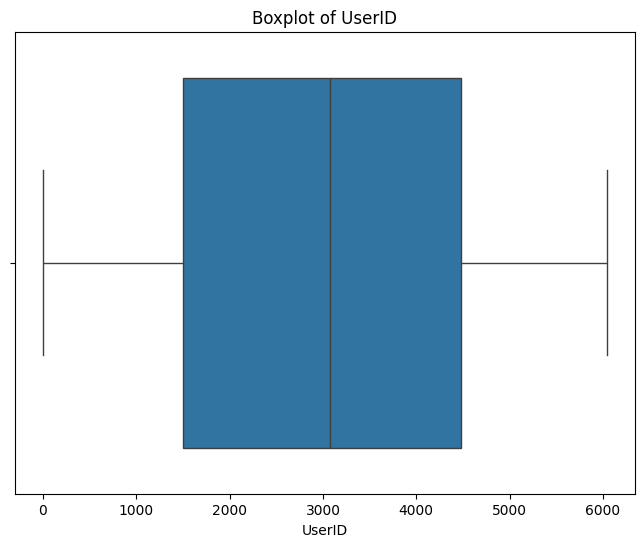

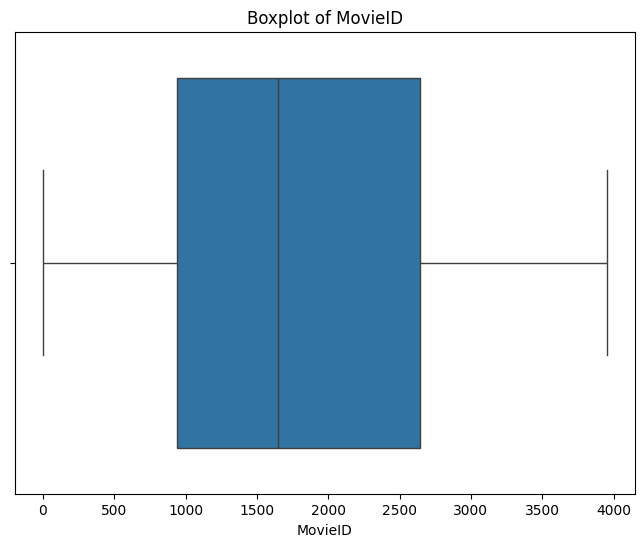

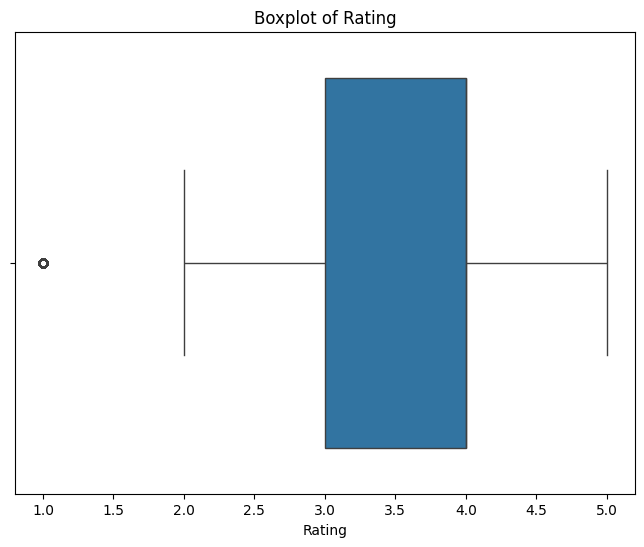

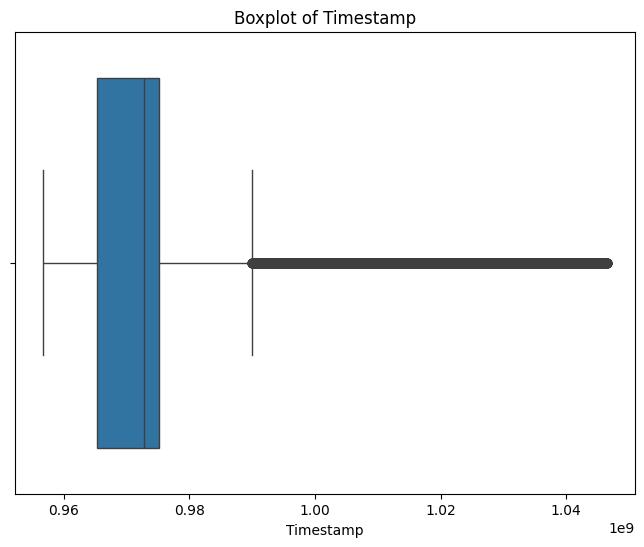

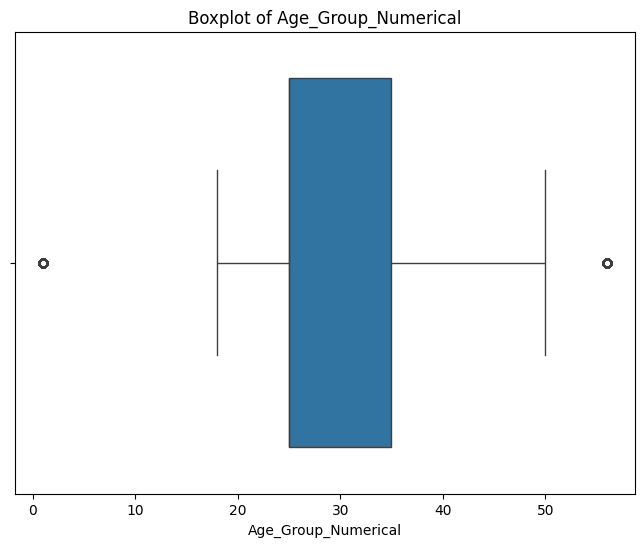

In [10]:
# prompt: boxplot ตัวแปรแต่ละตัว

import matplotlib.pyplot as plt
import seaborn as sns

# เลือกเฉพาะคอลัมน์ที่เป็นตัวเลข
numerical_cols = merged_df.select_dtypes(include=['number']).columns

# สร้าง boxplot สำหรับแต่ละคอลัมน์
for col in numerical_cols:
    plt.figure(figsize=(8, 6))  # ปรับขนาดกราฟตามต้องการ
    sns.boxplot(x=merged_df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

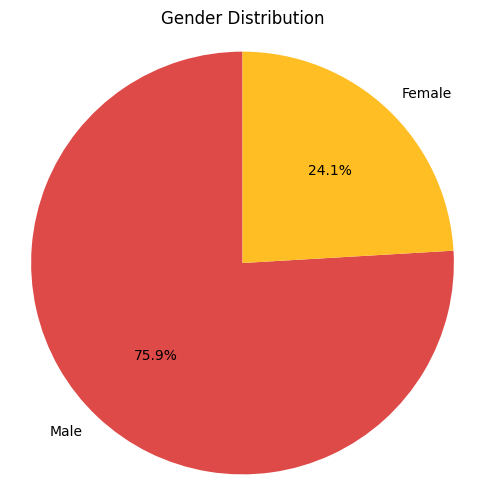

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
mycolors = {'#ffbe24','#466288','#de4a48'}
# Assuming 'Gender' column has values 0 and 1 (or 'M' and 'F')
gender_counts = merged_df['Gender'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))  # Adjust the figure size as needed
plt.pie(gender_counts, labels=['Male', 'Female'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette(mycolors))
plt.title('Gender Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


/tmp/ipython-input-1179796892.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Age_Group', y='Unique_UserID_Count', data=age_counts_unique_df, palette='crest', order=age_counts_unique_df['Age_Group'].tolist(), hue=None)


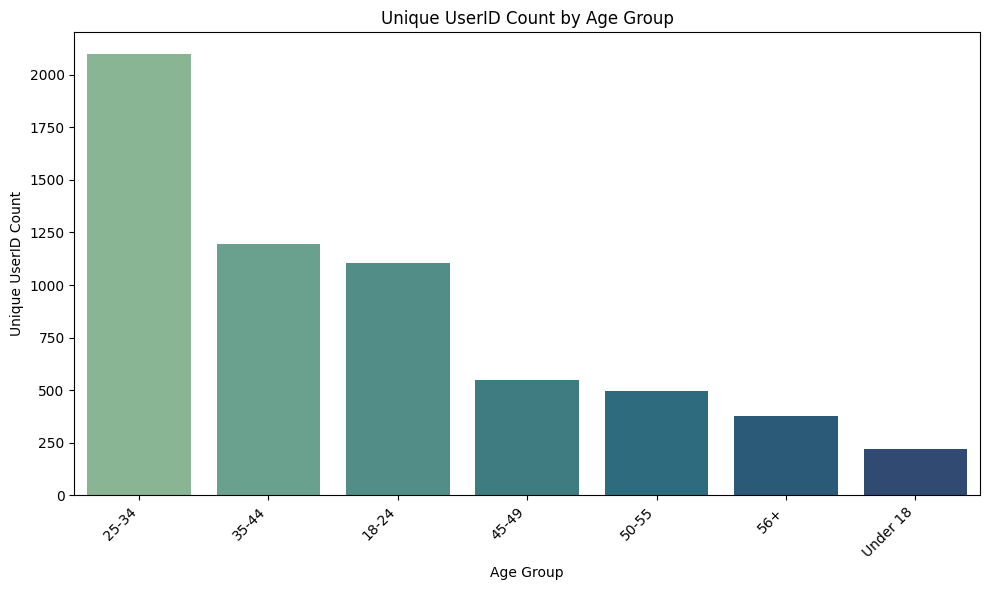

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the users dataframe
users_path = '/content/drive/My Drive/ProjectBigData/ml-1m/users.dat'
users = pd.read_csv(users_path, sep="::", engine='python', encoding='latin-1',
                    names=["UserID", "Gender", "Age", "Occupation", "Zip-code"])


# Define age bins based on the description in the markdown cell (0FgEb72bwXvU)
# Use the numerical age values directly for binning
age_bins = [0, 17, 24, 34, 44, 49, 55, users['Age'].max()] # Use 0 as the start for the lowest age group
age_labels = ['Under 18', '18-24', '25-34', '35-44', '45-49', '50-55', '56+']

# Create Age Group column in the users dataframe using the numerical 'Age' column
# Use include_lowest=True to include the lowest boundary (age 0)
users['Age_Group'] = pd.cut(users['Age'], bins=age_bins, labels=age_labels, right=True, include_lowest=True)

# Count unique UserID in each age group, reset index to make it a DataFrame, and sort
age_counts_unique_df = users.groupby('Age_Group', observed=True)['UserID'].nunique().reset_index(name='Unique_UserID_Count') # Explicitly set observed=True
age_counts_unique_df = age_counts_unique_df.sort_values('Unique_UserID_Count', ascending=False)

# Create Bar Chart for Unique UserID Count
plt.figure(figsize=(10, 6))
# Use the DataFrame for plotting, specifying x and y columns and order
# Explicitly set hue=None to address the warning
sns.barplot(x='Age_Group', y='Unique_UserID_Count', data=age_counts_unique_df, palette='crest', order=age_counts_unique_df['Age_Group'].tolist(), hue=None)

# Set title and labels
plt.title('Unique UserID Count by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Unique UserID Count')

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

/tmp/ipython-input-4191089321.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=occupation_counts_unique.index, y=occupation_counts_unique.values,


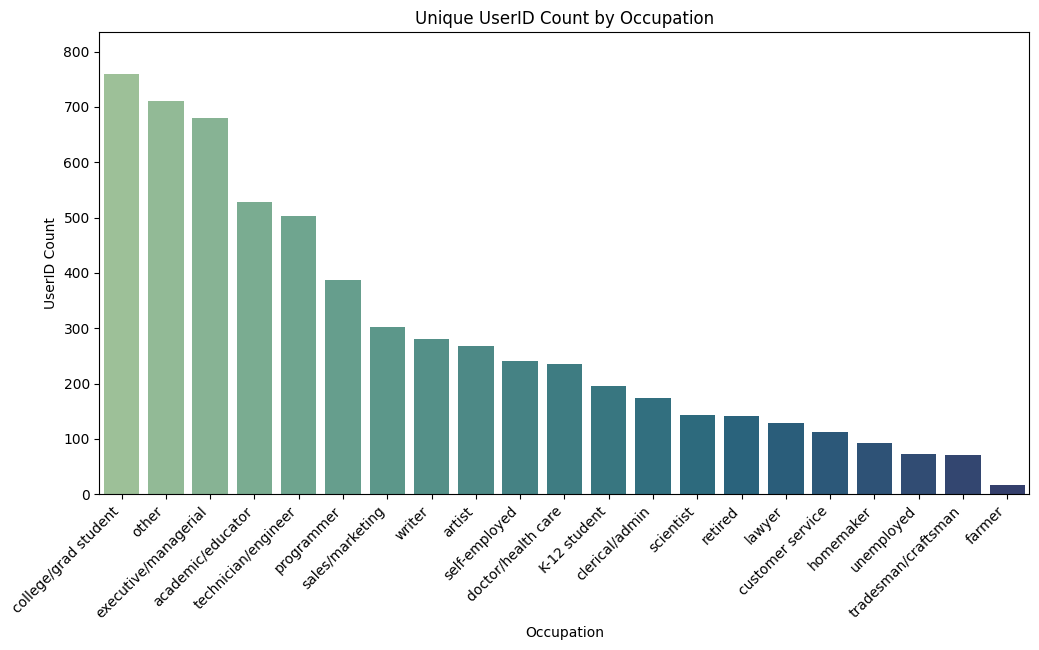

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure merged_df is available
if 'merged_df' not in locals() or merged_df.empty:
    print("DataFrame 'merged_df' is not available. Please run previous data loading and preparation steps.")
else:
    # Define occupation labels
    # NOTE: The mapping in the markdown cell 0FgEb72bwXvU uses integers as keys,
    # but merged_df['Occupation'] was already mapped to strings in cell Jx1OaCqpDqtb
    # So we can use the values from that mapping for labels
    occupation_labels_map = {
        0: "other" ,
        1: "academic/educator",
        2: "artist",
        3: "clerical/admin",
        4: "college/grad student",
        5: "customer service",
        6: "doctor/health care",
        7: "executive/managerial",
        8: "farmer",
        9: "homemaker",
        10: "K-12 student",
        11: "lawyer",
        12: "programmer",
        13: "retired",
        14: "sales/marketing",
        15: "scientist",
        16: "self-employed",
        17: "technician/engineer",
        18: "tradesman/craftsman",
        19: "unemployed",
        20: "writer"
    }
    # Get the unique occupation names from the merged_df after mapping
    unique_occupation_names = merged_df['Occupation'].unique()
    # Create a list of labels in the desired order for xticks if needed, but using index directly is better

    # Count unique UserID in each occupation and sort from most to least
    # Use 'Occupation' column which is already mapped to strings
    occupation_counts_unique = merged_df.groupby('Occupation')['UserID'].nunique().sort_values(ascending=False)

    # Create Bar Chart by sorting from most to least using 'order'
    plt.figure(figsize=(12, 6))
    # Use the aggregated data for plotting
    # Explicitly set hue=None to address the warning
    sns.barplot(x=occupation_counts_unique.index, y=occupation_counts_unique.values,
                order=occupation_counts_unique.index,
                palette='crest', hue=None)

    # Set graph and axis titles
    plt.title('Unique UserID Count by Occupation')
    plt.xlabel('Occupation')
    plt.ylabel('UserID Count')

    # Adjust occupation names for better display
    # Use the index of the sorted counts directly as labels
    plt.xticks(ticks=range(len(occupation_counts_unique)), labels=occupation_counts_unique.index, rotation=45, ha='right')

    # Set y-axis limits to prevent values from going off the chart
    plt.ylim(0, occupation_counts_unique.max() * 1.1)

    # Show graph
    plt.show()

/tmp/ipython-input-2111680111.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Genres', data=merged_df, palette=gold_colors, order=genre_order, hue=None) # Explicitly set hue=None


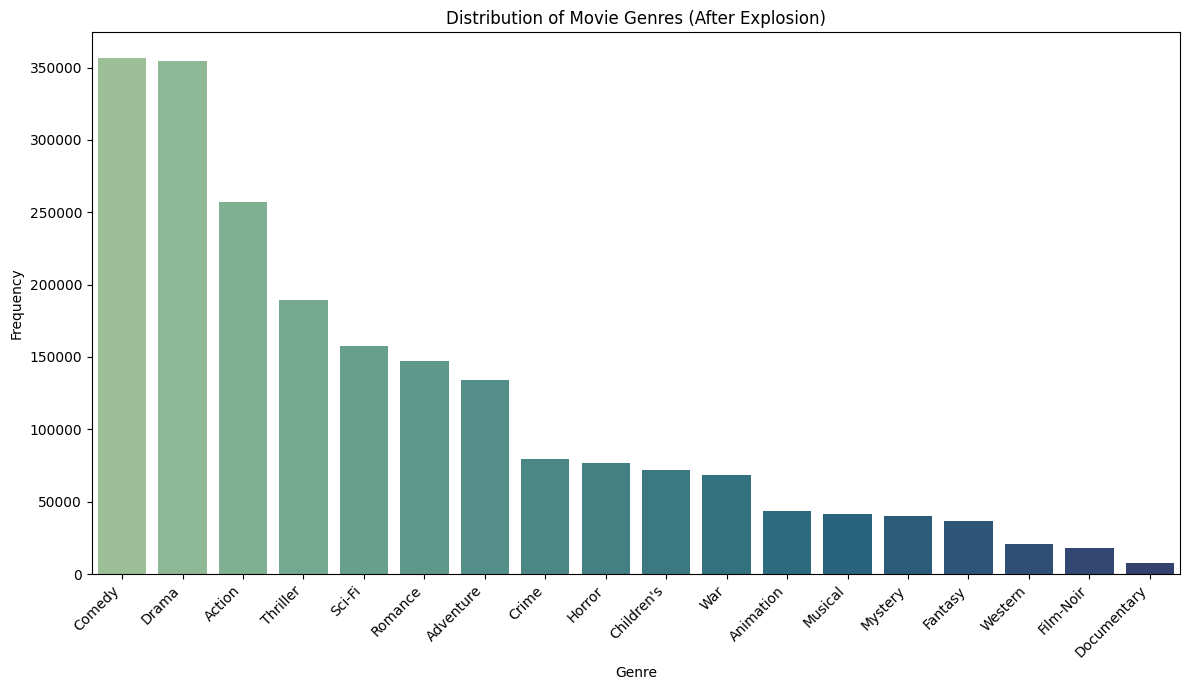

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.colors as mcolors

# Ensure merged_df is available and has the 'Genres' column (after explosion)
if 'merged_df' not in locals() or merged_df.empty or 'Genres' not in merged_df.columns:
    print("DataFrame 'merged_df' with 'Genres' column (after explosion) is not available. Please run previous data loading and preparation steps.")
else:
    # Create a color palette
    gold_colors = sns.color_palette('crest', n_colors=merged_df['Genres'].nunique())


    # Create a countplot for the 'Genres' column
    plt.figure(figsize=(12, 7))
    # Get the order of genres by count
    genre_order = merged_df['Genres'].value_counts().index
    sns.countplot(x='Genres', data=merged_df, palette=gold_colors, order=genre_order, hue=None) # Explicitly set hue=None
    plt.title('Distribution of Movie Genres (After Explosion)')
    plt.xlabel('Genre')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout() # Adjust layout to prevent labels overlapping
    plt.show()

In [15]:
# --- STEP 1: Import Library ---
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Theme สีโทนร้อน
sns.set_theme(style="whitegrid", palette="autumn")
plt.rcParams['figure.figsize'] = (8, 5)
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12

# --- STEP 2: Load Data ---
movies_path = '/content/drive/My Drive/ProjectBigData/ml-1m/movies.dat'
ratings_path = '/content/drive/My Drive/ProjectBigData/ml-1m/ratings.dat'
users_path = '/content/drive/My Drive/ProjectBigData/ml-1m/users.dat'

users = pd.read_csv(users_path, sep="::", engine='python', encoding='latin-1',
                    names=["UserID", "Gender", "Age", "Occupation", "Zip-code"])
ratings = pd.read_csv(ratings_path, sep="::", engine='python', encoding='latin-1',
                      names=["UserID", "MovieID", "Rating", "Timestamp"])
movies = pd.read_csv(movies_path, sep="::", engine='python', encoding='latin-1',
                     names=["MovieID", "Title", "Genres"])

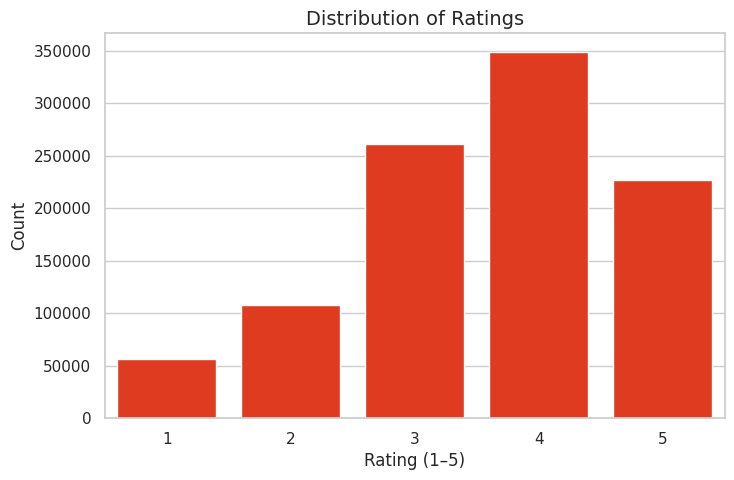

=== Descriptive Stats: Ratings ===


count    1.000209e+06
mean     3.581564e+00
std      1.117102e+00
min      1.000000e+00
25%      3.000000e+00
50%      4.000000e+00
75%      4.000000e+00
max      5.000000e+00
Name: Rating, dtype: float64

In [16]:
# ======================================================
# 🧩 SECTION 1: Ratings Distribution
# ======================================================

plt.figure()
sns.countplot(x="Rating", data=ratings)
plt.title("Distribution of Ratings")
plt.xlabel("Rating (1–5)")
plt.ylabel("Count")
plt.show()

print("=== Descriptive Stats: Ratings ===")
display(ratings["Rating"].describe())

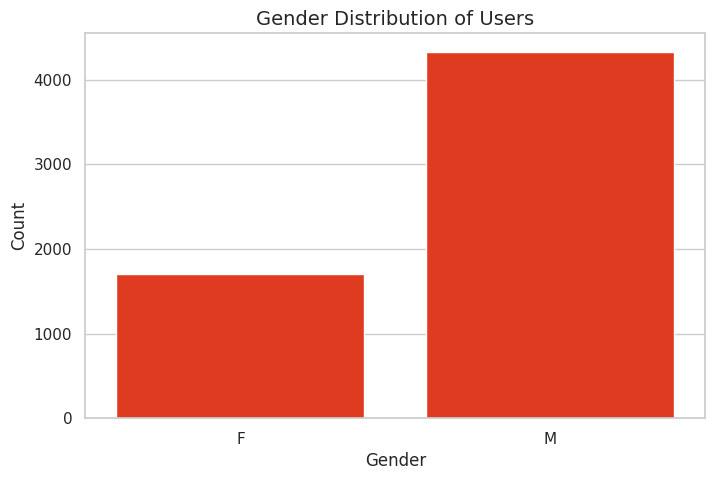

=== Gender Distribution (%) ===


Gender
M    71.705298
F    28.294702
Name: proportion, dtype: float64

In [17]:
# ======================================================
# 🧩 SECTION 2: Gender Distribution
# ======================================================

plt.figure()
sns.countplot(x="Gender", data=users)
plt.title("Gender Distribution of Users")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

print("=== Gender Distribution (%) ===")
display(users["Gender"].value_counts(normalize=True) * 100)

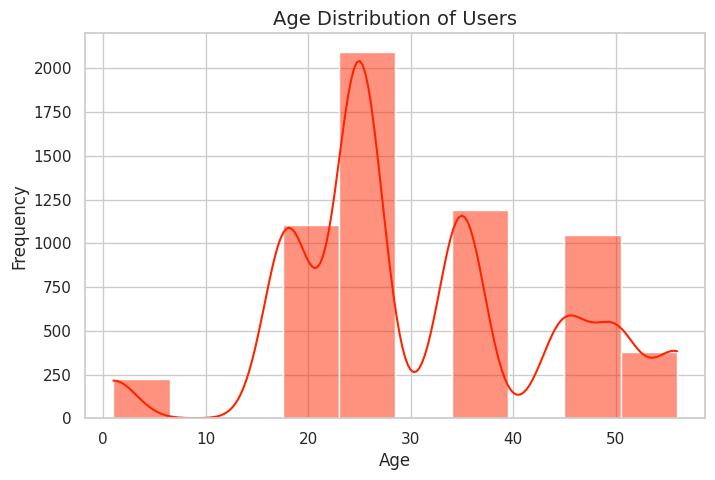

=== Descriptive Stats: Age (Users) ===


count    6040.000000
mean       30.639238
std        12.895962
min         1.000000
25%        25.000000
50%        25.000000
75%        35.000000
max        56.000000
Name: Age, dtype: float64

In [18]:
# ======================================================
# 🧩 SECTION 3: Age Distribution
# ======================================================

plt.figure()
sns.histplot(users["Age"], bins=10, kde=True)
plt.title("Age Distribution of Users")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

print("=== Descriptive Stats: Age (Users) ===")
display(users["Age"].describe())

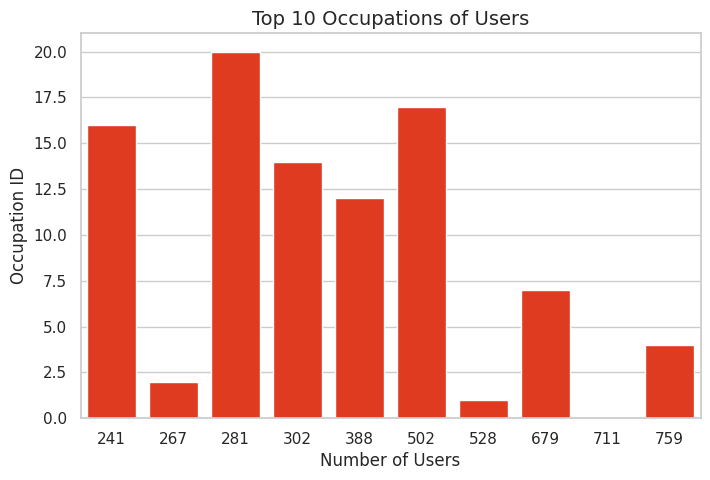

=== Occupation Distribution (Top 10) ===


Occupation
4     759
0     711
7     679
1     528
17    502
12    388
14    302
20    281
2     267
16    241
Name: count, dtype: int64

In [19]:
# ======================================================
# 🧩 SECTION 4: Occupation
# ======================================================

top_occ = users["Occupation"].value_counts().head(10)
plt.figure()
sns.barplot(x=top_occ.values, y=top_occ.index)
plt.title("Top 10 Occupations of Users")
plt.xlabel("Number of Users")
plt.ylabel("Occupation ID")
plt.show()

print("=== Occupation Distribution (Top 10) ===")
display(top_occ)

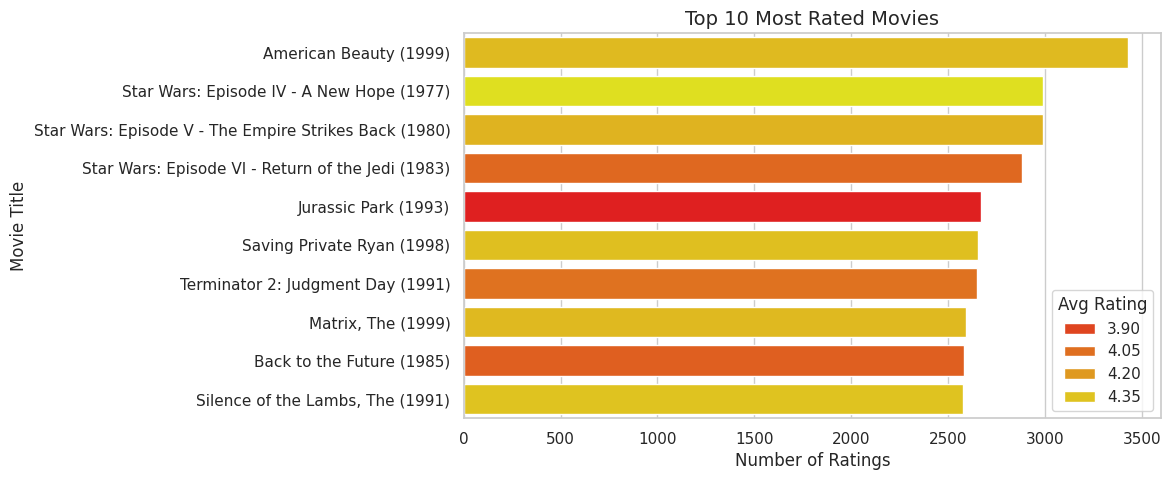

=== Top 10 Most Rated Movies (with Average Rating) ===


Title  Number of Ratings  \
0                             American Beauty (1999)               3428   
1          Star Wars: Episode IV - A New Hope (1977)               2991   
2  Star Wars: Episode V - The Empire Strikes Back...               2990   
3  Star Wars: Episode VI - Return of the Jedi (1983)               2883   
4                               Jurassic Park (1993)               2672   
5                         Saving Private Ryan (1998)               2653   
6                  Terminator 2: Judgment Day (1991)               2649   
7                                 Matrix, The (1999)               2590   
8                          Back to the Future (1985)               2583   
9                   Silence of the Lambs, The (1991)               2578   

   Average Rating  
0        4.317386  
1        4.453694  
2        4.292977  
3        4.022893  
4        3.763847  
5        4.337354  
6        4.058513  
7        4.315830  
8        3.990321  
9        4.351823

In [20]:
# ======================================================
# 🧩 SECTION 5: Movies with Most Ratings
# ======================================================

movie_stats = ratings.groupby("MovieID")["Rating"].agg(["count", "mean"]).reset_index()
top_movies = movie_stats.sort_values("count", ascending=False).head(10)
top_movies = top_movies.merge(movies[["MovieID", "Title"]], on="MovieID", how="left")

plt.figure(figsize=(9, 5))
sns.barplot(x="count", y="Title", data=top_movies, hue="mean", dodge=False, palette="autumn")
plt.title("Top 10 Most Rated Movies")
plt.xlabel("Number of Ratings")
plt.ylabel("Movie Title")
plt.legend(title="Avg Rating", loc="lower right")
plt.show()

print("=== Top 10 Most Rated Movies (with Average Rating) ===")
display(top_movies[["Title", "count", "mean"]].rename(columns={
    "count": "Number of Ratings", "mean": "Average Rating"
}))

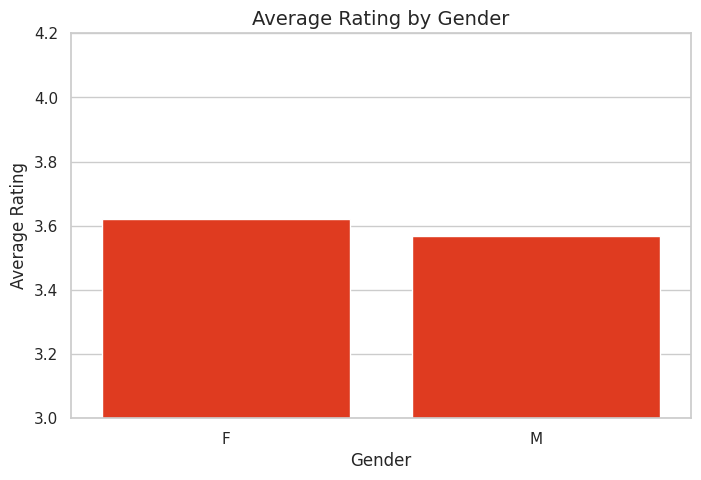

=== Average Rating by Gender ===


Gender    Rating
0      F  3.620366
1      M  3.568879

In [21]:
# ======================================================
# 🧩 SECTION 6: Rating per Gender
# ======================================================

gender_rating = ratings.merge(users[["UserID", "Gender"]], on="UserID")
avg_rating_by_gender = gender_rating.groupby("Gender")["Rating"].mean().reset_index()

plt.figure()
sns.barplot(x="Gender", y="Rating", data=avg_rating_by_gender)
plt.title("Average Rating by Gender")
plt.ylabel("Average Rating")
plt.ylim(3, 4.2)
plt.show()

print("=== Average Rating by Gender ===")
display(avg_rating_by_gender)

In [22]:
# ======================================================
# 🧾 SECTION 7: Summary Overview
# ======================================================

print("=== SUMMARY OVERVIEW ===")
print(f"จำนวนผู้ใช้ทั้งหมด: {users['UserID'].nunique()}")
print(f"จำนวนภาพยนตร์ทั้งหมด: {movies['MovieID'].nunique()}")
print(f"จำนวนการให้คะแนนทั้งหมด: {ratings.shape[0]}")
print(f"คะแนนเฉลี่ยโดยรวม: {ratings['Rating'].mean():.2f}")


=== SUMMARY OVERVIEW ===
จำนวนผู้ใช้ทั้งหมด: 6040
จำนวนภาพยนตร์ทั้งหมด: 3883
จำนวนการให้คะแนนทั้งหมด: 1000209
คะแนนเฉลี่ยโดยรวม: 3.58


In [23]:
# ======================================================
# 📊 SECTION 1: DESCRIPTIVE STATISTICS (ฉบับสมบูรณ์โทนสีร้อน)
# ======================================================

# --- STEP 1: Import Libraries ---
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- STEP 2: Load Data ---
movies = '/content/drive/My Drive/ProjectBigData/ml-1m/movies.dat'
ratings = '/content/drive/My Drive/ProjectBigData/ml-1m/ratings.dat'
users = '/content/drive/My Drive/ProjectBigData/ml-1m/users.dat'

users = pd.read_csv(users, sep="::", engine='python', encoding='latin-1',
                    names=["UserID", "Gender", "Age", "Occupation", "Zip-code"])
ratings = pd.read_csv(ratings, sep="::", engine='python', encoding='latin-1',
                      names=["UserID", "MovieID", "Rating", "Timestamp"])
movies = pd.read_csv(movies, sep="::", engine='python', encoding='latin-1',
                     names=["MovieID", "Title", "Genres"])

# --- STEP 3: Theme Setting (โทนสีร้อน) ---
sns.set(style="whitegrid", palette="autumn")
plt.rcParams['figure.facecolor'] = '#fffaf0'
plt.rcParams['axes.facecolor'] = '#fffaf0'
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.titleweight'] = 'bold'

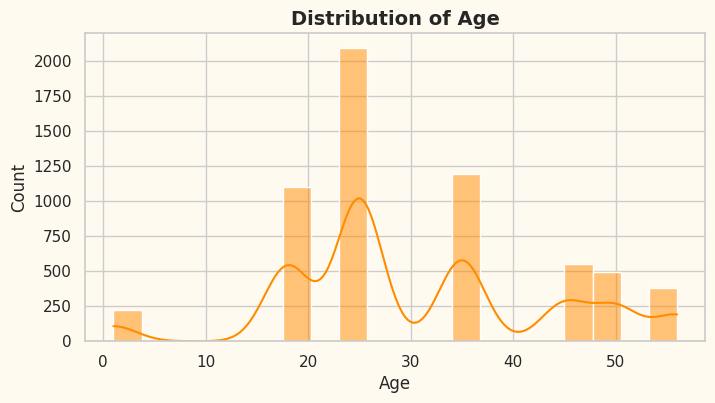

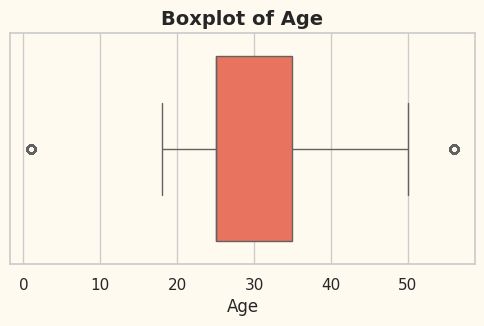

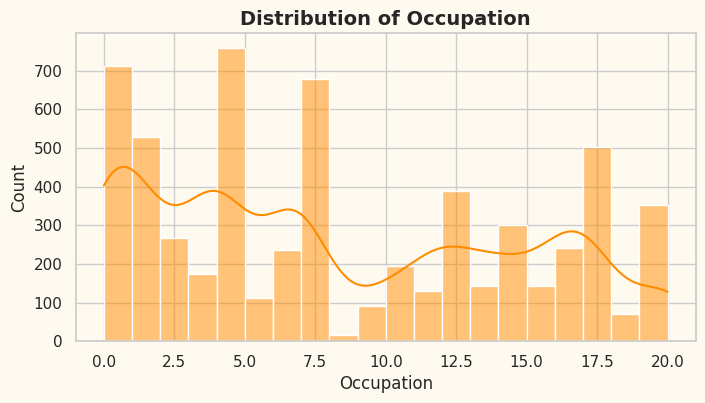

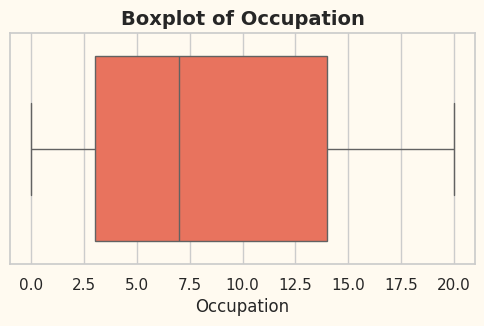

In [24]:
# ======================================================
# 1️⃣ Distribution & Summary for True Numerical Variables
# ======================================================

# คัดเฉพาะคอลัมน์ที่เป็นเชิงปริมาณจริง ๆ (เช่น อายุ, Occupation ถ้ามีความหมาย)
numeric_cols = [col for col in users.select_dtypes(include=['int64', 'float64']).columns
                if col not in ['UserID', 'Zip-code']]

for col in numeric_cols:
    # 🔶 กราฟ Distribution
    plt.figure(figsize=(8,4))
    sns.histplot(users[col], bins=20, kde=True, color='darkorange')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

    # 🔶 ตาราง Summary Statistics (เฉพาะคอลัมน์นั้น)
    desc = pd.DataFrame({
        'Mean': [users[col].mean()],
        'Median': [users[col].median()],
        'Std': [users[col].std()],
        'Min': [users[col].min()],
        'Max': [users[col].max()],
        'Skewness': [users[col].skew()],
        'Kurtosis': [users[col].kurtosis()]
    }, index=[col])
    display(desc.style.background_gradient(cmap='OrRd'))

    # 🔶 กราฟ Boxplot
    plt.figure(figsize=(6,3))
    sns.boxplot(x=users[col], color='tomato')
    plt.title(f'Boxplot of {col}')
    plt.show()


/tmp/ipython-input-2311108367.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=users, x=col, palette='autumn')


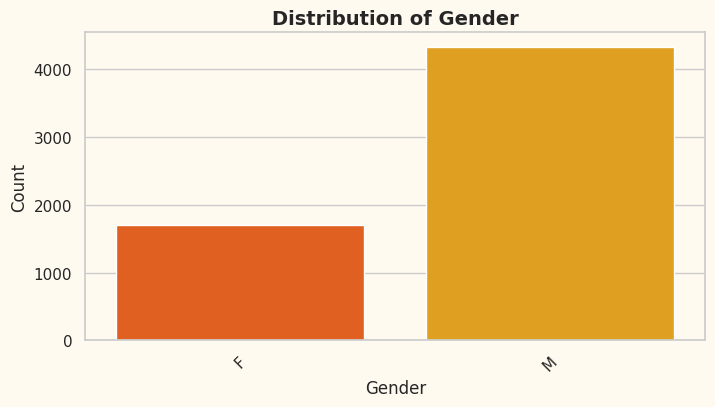

In [25]:
# ======================================================
# 2️⃣ Distribution & Summary for Categorical Variables
# ======================================================
cat_cols = [col for col in users.select_dtypes(include=['object']).columns
            if col not in ['Zip-code']]

for col in cat_cols:
    # 🔶 กราฟ Countplot
    plt.figure(figsize=(8,4))
    sns.countplot(data=users, x=col, palette='autumn')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

    # 🔶 ตาราง Count
    count_table = users[col].value_counts().to_frame('Count')
    display(count_table.style.background_gradient(cmap='YlOrBr'))

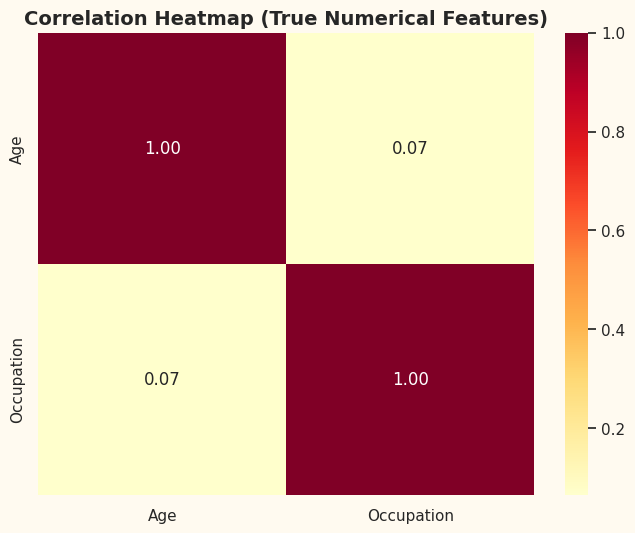

In [26]:
# ======================================================
# 3️⃣ Correlation Heatmap
# ======================================================
plt.figure(figsize=(8,6))
sns.heatmap(users[numeric_cols].corr(numeric_only=True), annot=True, cmap='YlOrRd', fmt='.2f')
plt.title('Correlation Heatmap (True Numerical Features)')
plt.show()

In [27]:
# ======================================================
# 4️⃣ Summary Statistics (รวมทุกคอลัมน์เชิงปริมาณจริง)
# ======================================================
summary = users[numeric_cols].describe().T
summary['median'] = users[numeric_cols].median()
summary['skewness'] = users[numeric_cols].skew()
summary['kurtosis'] = users[numeric_cols].kurtosis()

display(summary.style.background_gradient(cmap='OrRd')
        .set_caption("Overall Summary Statistics (Users Data, excluding ID & Code columns)"))

/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)


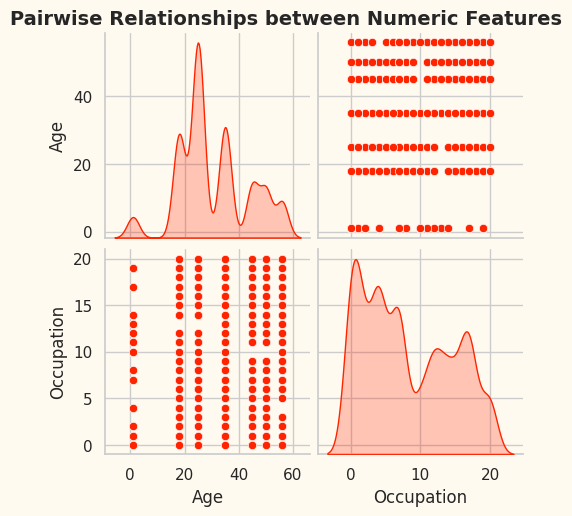

In [28]:
# ======================================================
# 5️⃣ Pairplot (Optional)
# ======================================================
if len(numeric_cols) > 1:
    sns.pairplot(users[numeric_cols], diag_kind='kde', palette='autumn')
    plt.suptitle('Pairwise Relationships between Numeric Features', y=1.02, fontsize=14, fontweight='bold')
    plt.show()

In [29]:
# ======================================================
# 📊 FULL DESCRIPTIVE ANALYSIS: Users + Ratings + Movies
# ======================================================

# --- STEP 1: Import Libraries ---
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- STEP 2: Load Data ---
movies_path = '/content/drive/My Drive/ProjectBigData/ml-1m/movies.dat'
ratings_path = '/content/drive/My Drive/ProjectBigData/ml-1m/ratings.dat'
users_path = '/content/drive/My Drive/ProjectBigData/ml-1m/users.dat'

users = pd.read_csv(users_path, sep="::", engine='python', encoding='latin-1',
                    names=["UserID", "Gender", "Age", "Occupation", "Zip-code"])
ratings = pd.read_csv(ratings_path, sep="::", engine='python', encoding='latin-1',
                      names=["UserID", "MovieID", "Rating", "Timestamp"])
movies = pd.read_csv(movies_path, sep="::", engine='python', encoding='latin-1',
                     names=["MovieID", "Title", "Genres"])

# --- STEP 3: Theme Setting (โทนสีร้อน) ---
sns.set(style="whitegrid", palette="autumn")
plt.rcParams['figure.facecolor'] = '#fffaf0'
plt.rcParams['axes.facecolor'] = '#fffaf0'
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.titleweight'] = 'bold'

/tmp/ipython-input-1836399934.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Rating", data=ratings, palette='autumn')


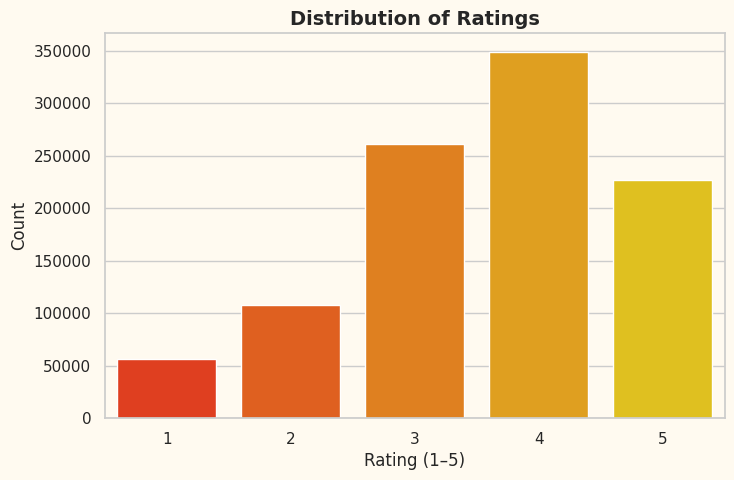

count    1.000209e+06
mean     3.581564e+00
std      1.117102e+00
min      1.000000e+00
25%      3.000000e+00
50%      4.000000e+00
75%      4.000000e+00
max      5.000000e+00
Name: Rating, dtype: float64

In [30]:
# ======================================================
# 1️⃣ Ratings Distribution
# ======================================================
plt.figure(figsize=(8,5))
sns.countplot(x="Rating", data=ratings, palette='autumn')
plt.title("Distribution of Ratings")
plt.xlabel("Rating (1–5)")
plt.ylabel("Count")
plt.show()

display(ratings["Rating"].describe())

/tmp/ipython-input-200238247.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Gender", data=users, palette='autumn')


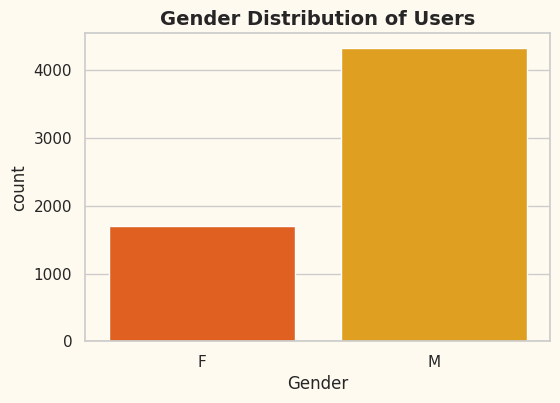

Gender
M    71.705298
F    28.294702
Name: proportion, dtype: float64

In [31]:
# ======================================================
# 2️⃣ Gender Distribution
# ======================================================
plt.figure(figsize=(6,4))
sns.countplot(x="Gender", data=users, palette='autumn')
plt.title("Gender Distribution of Users")
plt.show()

display(users["Gender"].value_counts(normalize=True)*100)

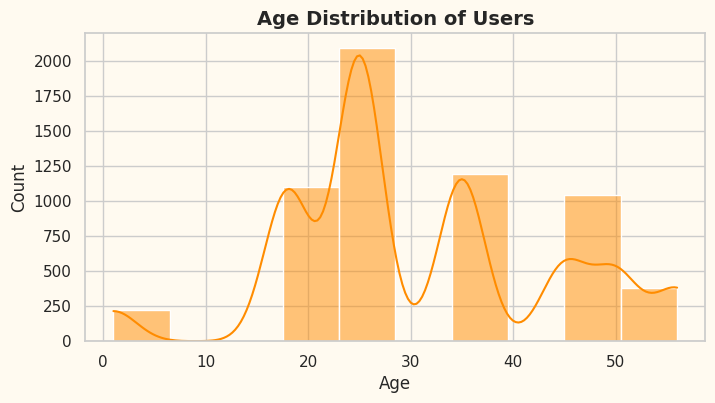

count    6040.000000
mean       30.639238
std        12.895962
min         1.000000
25%        25.000000
50%        25.000000
75%        35.000000
max        56.000000
Name: Age, dtype: float64

In [32]:
# ======================================================
# 3️⃣ Age Distribution
# ======================================================
plt.figure(figsize=(8,4))
sns.histplot(users["Age"], bins=10, kde=True, color='darkorange')
plt.title("Age Distribution of Users")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

display(users["Age"].describe())

/tmp/ipython-input-2058230522.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_occ.values, y=top_occ.index, palette='autumn')


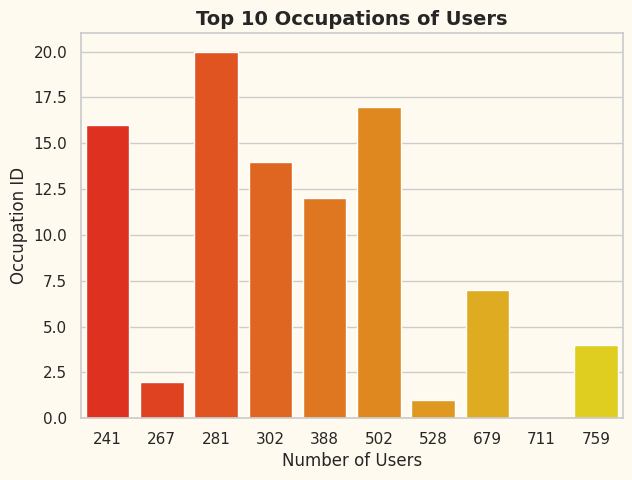

Occupation
4     759
0     711
7     679
1     528
17    502
12    388
14    302
20    281
2     267
16    241
Name: count, dtype: int64

In [33]:
# ======================================================
# 4️⃣ Top 10 Occupations
# ======================================================
top_occ = users["Occupation"].value_counts().head(10)
plt.figure(figsize=(7,5))
sns.barplot(x=top_occ.values, y=top_occ.index, palette='autumn')
plt.title("Top 10 Occupations of Users")
plt.xlabel("Number of Users")
plt.ylabel("Occupation ID")
plt.show()

display(top_occ)

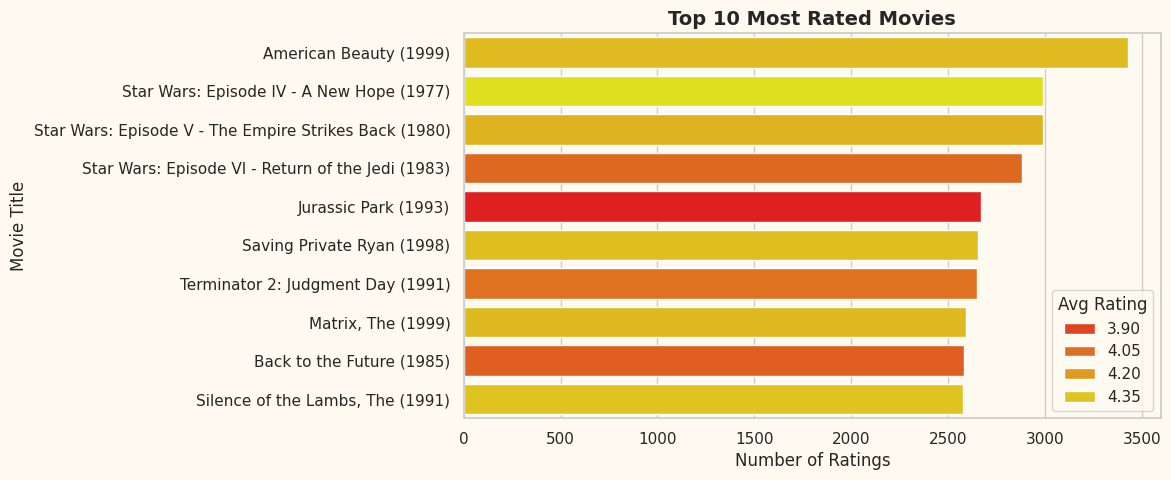

Title  Number of Ratings  \
0                             American Beauty (1999)               3428   
1          Star Wars: Episode IV - A New Hope (1977)               2991   
2  Star Wars: Episode V - The Empire Strikes Back...               2990   
3  Star Wars: Episode VI - Return of the Jedi (1983)               2883   
4                               Jurassic Park (1993)               2672   
5                         Saving Private Ryan (1998)               2653   
6                  Terminator 2: Judgment Day (1991)               2649   
7                                 Matrix, The (1999)               2590   
8                          Back to the Future (1985)               2583   
9                   Silence of the Lambs, The (1991)               2578   

   Average Rating  
0        4.317386  
1        4.453694  
2        4.292977  
3        4.022893  
4        3.763847  
5        4.337354  
6        4.058513  
7        4.315830  
8        3.990321  
9        4.351823

In [34]:
# ======================================================
# 5️⃣ Top 10 Most Rated Movies
# ======================================================
movie_stats = ratings.groupby("MovieID")["Rating"].agg(["count","mean"]).reset_index()
top_movies = movie_stats.sort_values("count", ascending=False).head(10)
top_movies = top_movies.merge(movies[["MovieID","Title"]], on="MovieID", how="left")

plt.figure(figsize=(9,5))
sns.barplot(x="count", y="Title", data=top_movies, hue="mean", dodge=False, palette="autumn")
plt.title("Top 10 Most Rated Movies")
plt.xlabel("Number of Ratings")
plt.ylabel("Movie Title")
plt.legend(title="Avg Rating", loc="lower right")
plt.show()

display(top_movies[["Title","count","mean"]].rename(columns={"count":"Number of Ratings","mean":"Average Rating"}))

/tmp/ipython-input-2311134386.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Gender", y="Rating", data=avg_rating_by_gender, palette='autumn')


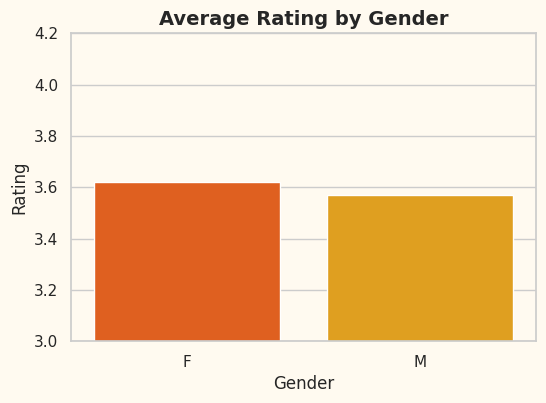

Gender    Rating
0      F  3.620366
1      M  3.568879

In [35]:
# ======================================================
# 6️⃣ Average Rating per Gender
# ======================================================
gender_rating = ratings.merge(users[["UserID","Gender"]], on="UserID")
avg_rating_by_gender = gender_rating.groupby("Gender")["Rating"].mean().reset_index()

plt.figure(figsize=(6,4))
sns.barplot(x="Gender", y="Rating", data=avg_rating_by_gender, palette='autumn')
plt.title("Average Rating by Gender")
plt.ylim(3,4.2)
plt.show()

display(avg_rating_by_gender)

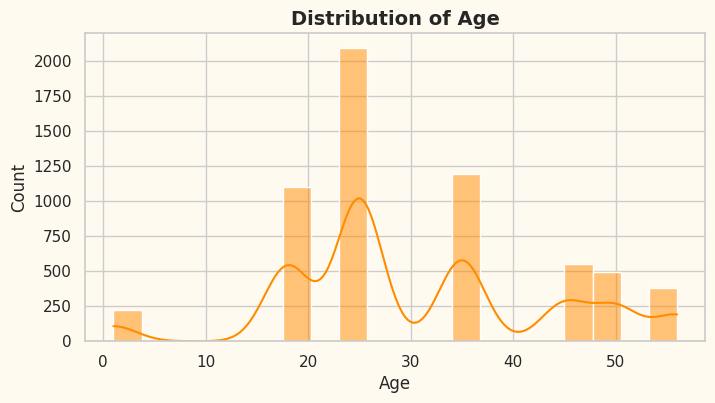

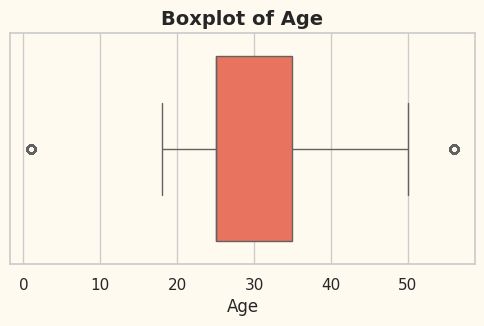

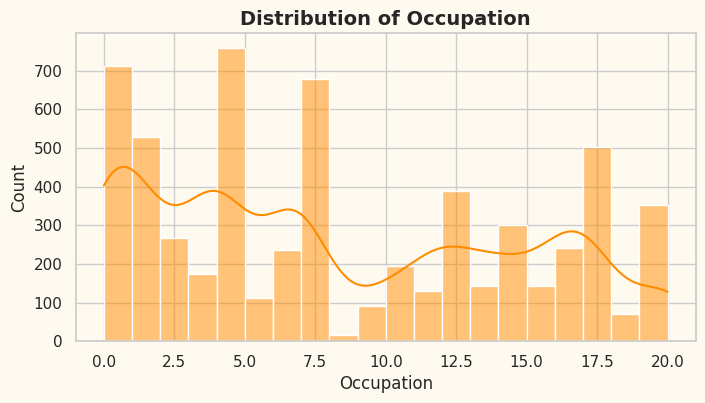

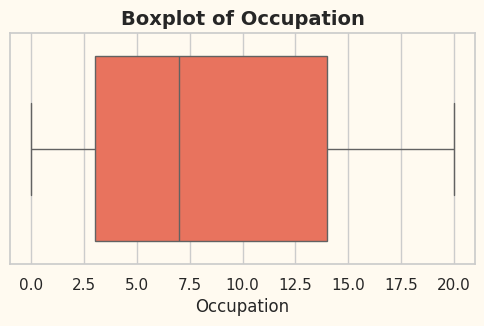

In [36]:
# ======================================================
# 7️⃣ Users - Numeric Features Analysis
# ======================================================
numeric_cols = [col for col in users.select_dtypes(include=['int64','float64']).columns if col not in ['UserID','Zip-code']]

for col in numeric_cols:
    # Distribution
    plt.figure(figsize=(8,4))
    sns.histplot(users[col], bins=20, kde=True, color='darkorange')
    plt.title(f'Distribution of {col}')
    plt.show()

    # Boxplot
    plt.figure(figsize=(6,3))
    sns.boxplot(x=users[col], color='tomato')
    plt.title(f'Boxplot of {col}')
    plt.show()

    # Summary stats
    desc = pd.DataFrame({
        "Mean":[users[col].mean()],
        "Median":[users[col].median()],
        "Std":[users[col].std()],
        "Min":[users[col].min()],
        "Max":[users[col].max()],
        "Skewness":[users[col].skew()],
        "Kurtosis":[users[col].kurtosis()]
    }, index=[col])
    display(desc.style.background_gradient(cmap='OrRd'))

/tmp/ipython-input-3326322347.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=users, x=col, palette='autumn')


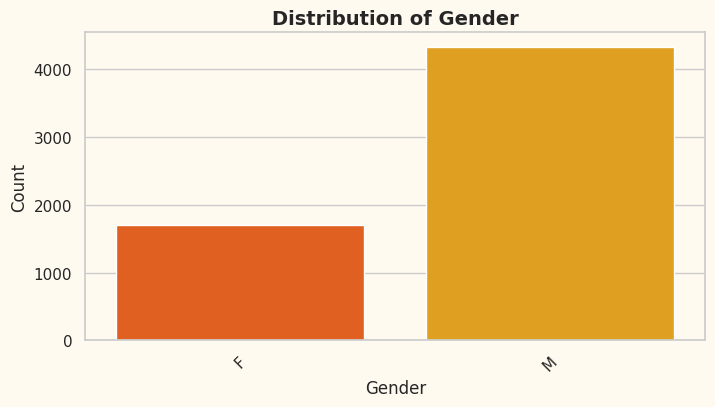

In [37]:
# ======================================================
# 8️⃣ Users - Categorical Features Analysis
# ======================================================
cat_cols = [col for col in users.select_dtypes(include=['object']).columns if col not in ['Zip-code']]

for col in cat_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(data=users, x=col, palette='autumn')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

    count_table = users[col].value_counts().to_frame('Count')
    display(count_table.style.background_gradient(cmap='YlOrBr'))

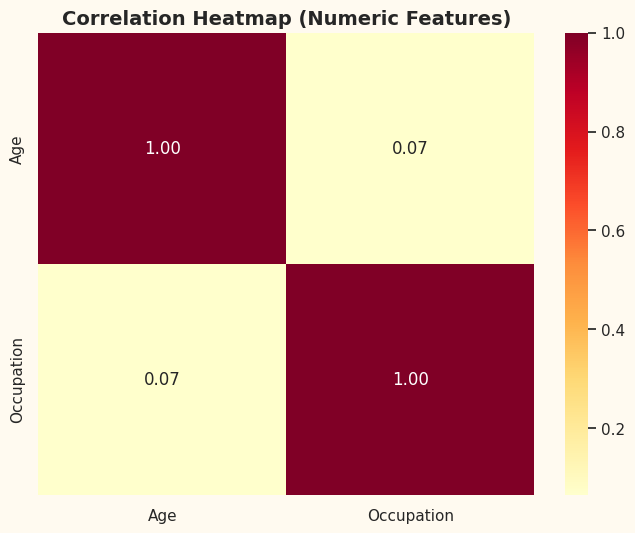

In [38]:
# ======================================================
# 9️⃣ Correlation Heatmap
# ======================================================
plt.figure(figsize=(8,6))
sns.heatmap(users[numeric_cols].corr(), annot=True, cmap='YlOrRd', fmt='.2f')
plt.title('Correlation Heatmap (Numeric Features)')
plt.show()

/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)


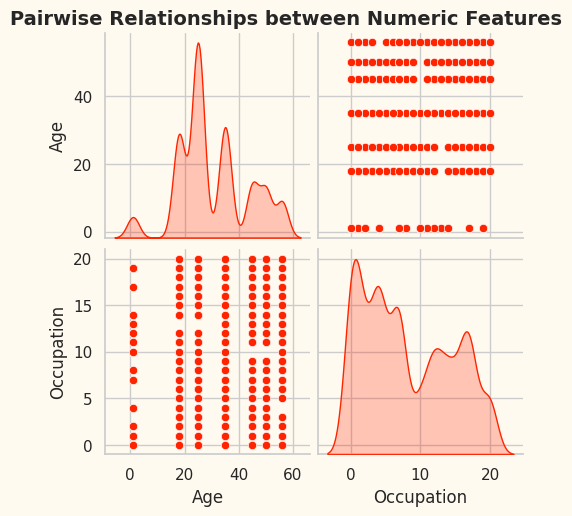

In [39]:
# ======================================================
# 🔟 Pairplot (Optional)
# ======================================================
if len(numeric_cols) > 1:
    sns.pairplot(users[numeric_cols], diag_kind='kde', palette='autumn')
    plt.suptitle('Pairwise Relationships between Numeric Features', y=1.02, fontsize=14, fontweight='bold')
    plt.show()

In [40]:
# ======================================================
# 1️⃣1️⃣ Summary Overview
# ======================================================
print("=== SUMMARY OVERVIEW ===")
print(f"Total Users: {users['UserID'].nunique()}")
print(f"Total Movies: {movies['MovieID'].nunique()}")
print(f"Total Ratings: {ratings.shape[0]}")
print(f"Overall Average Rating: {ratings['Rating'].mean():.2f}")

=== SUMMARY OVERVIEW ===
Total Users: 6040
Total Movies: 3883
Total Ratings: 1000209
Overall Average Rating: 3.58


In [41]:
# ไม่แน่ใจว่าส่วนนี้จะเอาไปใช้กับ data viz ได้มั้ย
# --- STEP 1: Ensure Data Merging for Comprehensive Analysis ---
# ทำการ Merge ข้อมูลทั้งหมดเข้าด้วยกันเพื่อวิเคราะห์ Rating ร่วมกับทุก Features
# (ถ้าทำแล้วในส่วนก่อนหน้านี้ให้ข้ามได้ แต่เพื่อให้โค้ดนี้ทำงานได้สมบูรณ์จึงใส่ไว้)
full_data = ratings.merge(users, on='UserID').merge(movies, on='MovieID')

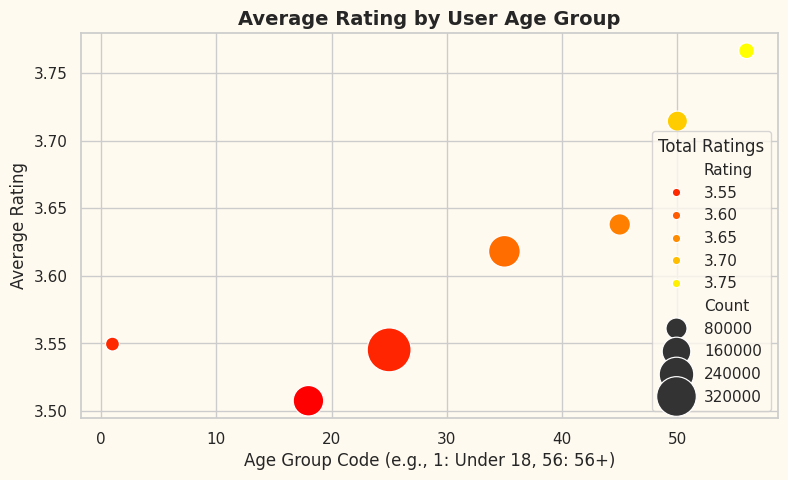

Age    Rating   Count
6   56  3.766632   38780
5   50  3.714512   72490
4   45  3.638062   83633
3   35  3.618162  199003
0    1  3.549520   27211
2   25  3.545235  395556
1   18  3.507573  183536

In [42]:
# --- STEP 1: Ensure Data Merging for Comprehensive Analysis ---
# ทำการ Merge ข้อมูลทั้งหมดเข้าด้วยกันเพื่อวิเคราะห์ Rating ร่วมกับทุก Features
# (ถ้าทำแล้วในส่วนก่อนหน้านี้ให้ข้ามได้ แต่เพื่อให้โค้ดนี้ทำงานได้สมบูรณ์จึงใส่ไว้)
full_data = ratings.merge(users, on='UserID').merge(movies, on='MovieID')
# ======================================================
# 1️⃣2️⃣ Average Rating by Age Group
# ======================================================
# วิเคราะห์ว่ากลุ่มอายุใดมีแนวโน้มให้คะแนนสูงหรือต่ำกว่ากลุ่มอื่น
avg_rating_by_age = full_data.groupby('Age')['Rating'].mean().reset_index()
# เพิ่มการนับจำนวนเรตติ้งเพื่อดูน้ำหนักของแต่ละกลุ่ม
age_counts = full_data.groupby('Age')['Rating'].count().reset_index().rename(columns={'Rating': 'Count'})
avg_rating_by_age = avg_rating_by_age.merge(age_counts, on='Age')

plt.figure(figsize=(9, 5))
# ใช้ขนาดของจุด (Count) เพื่อแสดงน้ำหนักของข้อมูล
sns.scatterplot(x='Age', y='Rating', size='Count', data=avg_rating_by_age,
                palette='autumn', sizes=(100, 1000), hue='Rating')
plt.title('Average Rating by User Age Group')
plt.xlabel('Age Group Code (e.g., 1: Under 18, 56: 56+)')
plt.ylabel('Average Rating')
plt.legend(title="Total Ratings", loc="lower right")
plt.show()
display(avg_rating_by_age.sort_values('Rating', ascending=False))

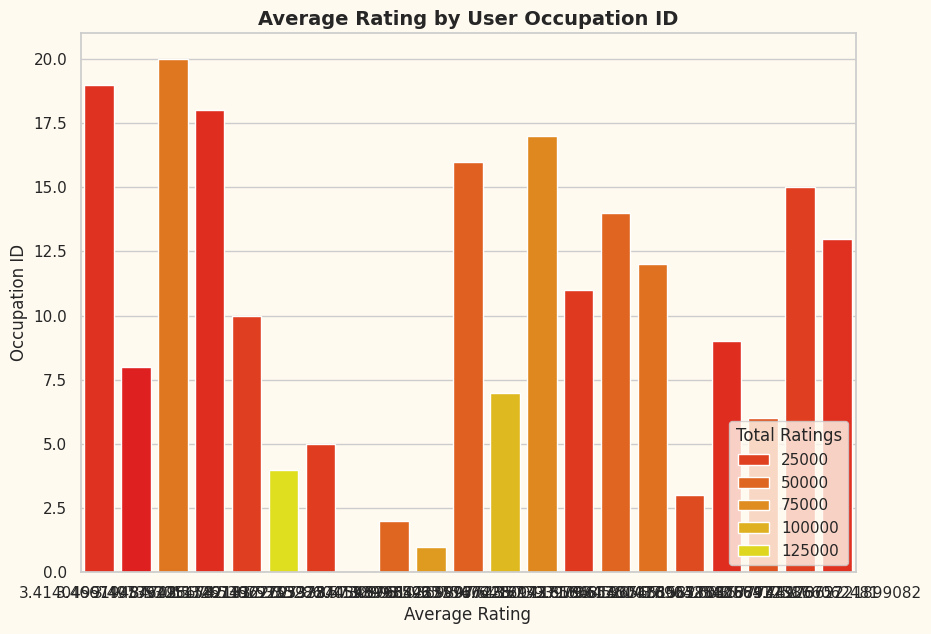

Occupation  Total Ratings  Average Rating
13          13          13754        3.781736
15          15          22951        3.689774
6            6          37205        3.661578
9            9          11345        3.656589
3            3          31623        3.656516
12          12          57214        3.654001
14          14          49109        3.618481
11          11          20563        3.617371
17          17          72816        3.613574
7            7         105425        3.599772
16          16          46021        3.596575
1            1          85351        3.576642
2            2          50068        3.573081
0            0         130499        3.537544
5            5          21850        3.537529
4            4         131032        3.536793
10          10          23290        3.532675
18          18          12086        3.530117
20          20          60397        3.497392
8            8           2706        3.466741
19          19          14904        3.414050

In [43]:
# ======================================================
# 1️⃣3️⃣ Average Rating by Occupation
# ======================================================
# วิเคราะห์ว่าอาชีพใดมีแนวโน้มให้คะแนนต่างจากอาชีพอื่น
avg_rating_by_occ = full_data.groupby('Occupation')['Rating'].agg(['count', 'mean']).reset_index()
avg_rating_by_occ = avg_rating_by_occ.sort_values('mean', ascending=False)

plt.figure(figsize=(10, 7))
# ใช้ Barplot เพื่อเปรียบเทียบค่าเฉลี่ย และใช้ Hue/Color เพื่อสื่อถึงจำนวน
sns.barplot(x='mean', y='Occupation', data=avg_rating_by_occ, palette='autumn', hue='count', dodge=False)
plt.title('Average Rating by User Occupation ID')
plt.xlabel('Average Rating')
plt.ylabel('Occupation ID')
plt.legend(title='Total Ratings', loc='lower right')
plt.show()
display(avg_rating_by_occ.rename(columns={'count': 'Total Ratings', 'mean': 'Average Rating'}))

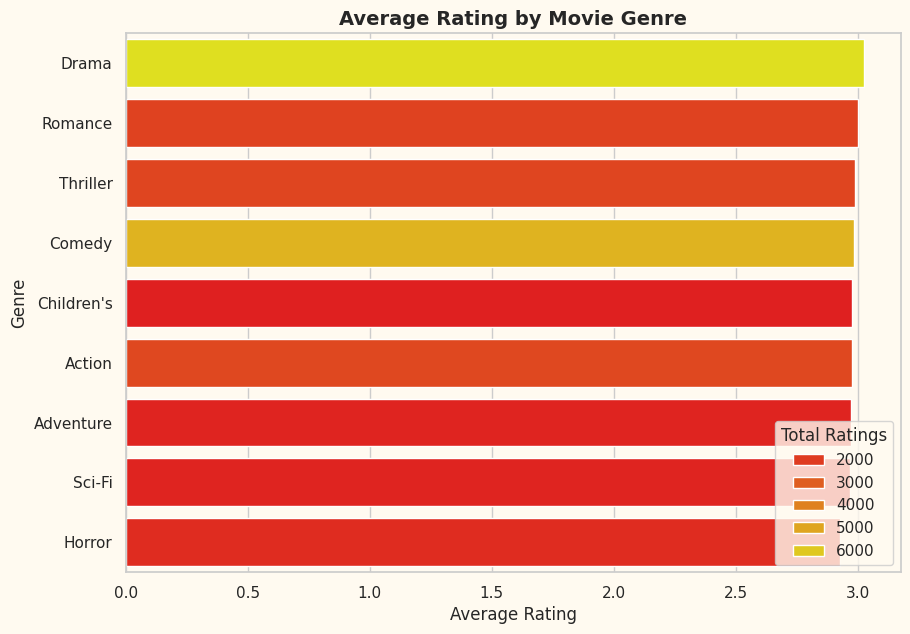

Genre  Total Ratings  Average Rating
7        Drama           6675        3.026367
13     Romance           2184        3.000458
15    Thriller           2304        2.988281
4       Comedy           5408        2.987426
3   Children's           1217        2.976993
0       Action           2368        2.976351
1    Adventure           1343        2.973194
14      Sci-Fi           1327        2.970610
10      Horror           1575        2.929524

In [44]:
# ======================================================
# 1️⃣4️⃣ Average Rating by Movie Genre
# ======================================================
# วิเคราะห์ว่าภาพยนตร์แนวไหนที่ได้คะแนนเฉลี่ยสูงที่สุด
# เนื่องจาก Genres เป็นข้อความที่มีหลายแนวคั่นด้วย '|' จึงต้องแยกออกมาก่อน

# Step A: Split Genres and Explode
genre_data = full_data[['MovieID', 'Rating', 'Genres']].drop_duplicates(subset=['MovieID', 'Rating']).copy()
genre_data['Genre'] = genre_data['Genres'].str.split('|')
genre_ratings = genre_data.explode('Genre')

# Step B: Calculate Avg Rating per Genre
avg_rating_by_genre = genre_ratings.groupby('Genre')['Rating'].agg(['count', 'mean']).reset_index()
# กรองแนวหนังที่มีจำนวนเรตติ้งน้อยกว่า 1000 ออก (Optional: เพื่อความน่าเชื่อถือ)
avg_rating_by_genre = avg_rating_by_genre[avg_rating_by_genre['count'] > 1000].sort_values('mean', ascending=False)

# Step C: Visualization
plt.figure(figsize=(10, 7))
sns.barplot(x='mean', y='Genre', data=avg_rating_by_genre, palette='autumn', hue='count', dodge=False)
plt.title('Average Rating by Movie Genre')
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.legend(title='Total Ratings', loc='lower right')
plt.show()

display(avg_rating_by_genre.rename(columns={'count': 'Total Ratings', 'mean': 'Average Rating'}))

In [45]:
import plotly.express as px
import pandas as pd

# -----------------------------------------------------
# 🔴 NEW WARM/AUTUMN COLOR PALETTE (โทนสีร้อน)
# -----------------------------------------------------
# สร้างชุดสีโทนร้อนใหม่จากเฉดสีหลักใน Plotly
warm_color_palette = px.colors.sequential.YlOrRd[:8] + px.colors.sequential.Reds[3:9]

# -----------------------------------------------------
# 🛠️ Re-run the Scatter Plot with the NEW WARM Palette
# -----------------------------------------------------

# Define movie_stats_filtered by filtering movie_stats
# Assuming movie_stats is available from previous cells (e.g., cell lQql7ux7NLQi)
# If not, you would need to recreate movie_stats here as well.
# Based on the notebook state, movie_stats is available.
MIN_COUNT = 50
movie_stats_filtered = movie_stats[movie_stats['count'] >= MIN_COUNT].copy()

# Merge with the movies dataframe to get Title and Genres
# Assuming movies dataframe is available from previous cells
movie_stats_filtered = movie_stats_filtered.merge(movies[['MovieID', 'Title', 'Genres']], on='MovieID', how='left')

# Rename columns to match the plotting code
movie_stats_filtered = movie_stats_filtered.rename(columns={'count': 'votes', 'mean': 'avg_rating'})

# Add 'Year' and 'Genre1' columns needed for hover_data and color
# Extract Year from Title
movie_stats_filtered['Year'] = movie_stats_filtered['Title'].str.extract(r'\((\d{4})\)').astype(float)

# Extract the first Genre
movie_stats_filtered['Genre1'] = movie_stats_filtered['Genres'].str.split('|').str[0]


fig = px.scatter(movie_stats_filtered, x='avg_rating', y='votes',
                 labels={'avg_rating': 'Average Rating', 'votes': 'Number of Votes'},
                 title='Relationship Between Average Rating and Number of Votes (Warm Theme)',
                 opacity=0.6,
                 hover_data=['Title', 'Year', 'Genre1', 'votes', 'avg_rating'],
                 color='Genre1', # Color by Genre1 to cycle through the palette
                 color_discrete_sequence=warm_color_palette, # ใช้ชุดสีโทนร้อนใหม่
                 log_y=True)

# ปรับ Layout ให้เข้ากับ Warm Theme เดิม
fig.update_layout(
    title_font_color="#b30000", # แดงเข้ม
    paper_bgcolor='#fffaf0', # สีงาช้างอ่อน (Warm, Light Background)
    plot_bgcolor='#ffffff',
    legend_title_text='Primary Genre'
)

fig.show()

In [46]:
color_palette = [
    '#B30000',  # Deep Red (Darkest)
    '#E31A1C',  # Bright Red
    '#FC4E2A',  # Red-Orange
    '#FD8D3C',  # Deep Orange
    '#FFC125',  # Golden Yellow (from YlOrRd)
    '#8B4513',  # Saddle Brown (Rich Earth)
    '#A0522D',  # Sienna (Russet Brown)
    '#CD853F',  # Peru (Medium Brown)
    '#D2B48C',  # Tan (Light Brown/Beige)
    '#FFD700',  # Gold
    '#FFC800',  # Rich Yellow
    '#FFA500',  # Orange
    '#FF8C00',  # Dark Orange
    '#FF6347',  # Tomato (Warm Pinkish-Red)
    '#FA8072',  # Salmon (Soft Warm Tone)
    '#696969',  # Dim Gray (Neutralizer)
    '#A9A9A9',  # Dark Gray (Neutralizer)
    '#800000',  # Maroon (Darkest Red)
    '#D2691E',  # Chocolate (Deep Orange-Brown)
    '#FEE09B',  # Light Orange/Yellow (Highlight)
    '#FFFACD'   # Lemon Chiffon (Softest Warm Highlight
]

In [85]:
import plotly.express as px
import pandas as pd

# ตัวอย่างการแมพค่ารหัส Genre กับชื่อจริง
genre_mapping = {
    0: 'None',
    1: 'Action',
    2: 'Adventure',
    3: 'Animation',
    4: "Children's",
    5: 'Comedy',
    6: 'Crime',
    7: 'Documentary',
    8: 'Drama',
    9: 'Fantasy',
    10: 'Film-Noir',
    11: 'Horror',
    12: 'Musical',
    13: 'Mystery',
    14: 'Romance',
    15: 'Sci-Fi',
    16: 'Thriller',
    17: 'War',
    18: 'Western'
}

# สร้าง Reverse Mapping สำหรับการแสดงผลใน Plotly
genre_reverse_mapping = {v: k for k, v in genre_mapping.items()}


# Ensure movies dataframe is loaded (assuming it is from previous cells)
# If not, load it here:
# movies_path = '/content/drive/My Drive/ProjectBigData/ml-1m/movies.dat'
# movies = pd.read_csv(movies_path, sep="::", engine='python', encoding='latin-1',
#                      names=["MovieID", "Title", "Genres"])


# Check if full_data (merged_df equivalent) is available
if 'full_data' not in locals() or full_data.empty:
    # If full_data is not available, try using merged_df
    if 'merged_df' not in locals() or merged_df.empty:
         print("DataFrames 'full_data' or 'merged_df' are empty or not defined. Please load and merge data first.")
    else:
        print("Using 'merged_df' as 'full_data' is not defined.")
        full_data = merged_df.copy()


if 'full_data' in locals() and not full_data.empty:
    print("DataFrame 'full_data' has the following columns:", full_data.columns)

    # Step 1: Split Genres from the original movies dataframe
    # It's better to split from the 'movies' dataframe as it has unique movie entries
    if 'movies' not in locals() or movies.empty:
        print("DataFrame 'movies' is empty or not defined. Please load movies data first.")
    else:
        genre_cols = movies['Genres'].str.split('|', expand=True)
        # Dynamically create column names based on the number of split columns
        new_col_names = [f'Split_Genre_{i+1}' for i in range(genre_cols.shape[1])]
        genre_cols.columns = new_col_names

        # Step 2: Add MovieID to the split genres dataframe for merging
        genre_cols['MovieID'] = movies['MovieID']

        # Step 3: Merge with the movies DataFrame to get Title and original Genres
        movie_genres_for_chart = movies[['MovieID', 'Title', 'Genres']].copy()
        movie_genres_for_chart = movie_genres_for_chart.merge(genre_cols, on='MovieID')

        # Check if the merged dataframe is empty
        if movie_genres_for_chart.empty:
            print("Merged DataFrame 'movie_genres_for_chart' is empty.")
        else:
            # Step 4: Use the split genre names directly for the path
            # No need to map to integer codes for the sunburst path
            filtered_df = movie_genres_for_chart.copy()

            # Remove fillna calls for Split_Genre_2 and Split_Genre_3
            # filtered_df['Split_Genre_2'] = filtered_df['Split_Genre_2'].fillna('None_2')
            # filtered_df['Split_Genre_3'] = filtered_df['Split_Genre_3'].fillna('None_3')


            # ตรวจสอบว่าหลังจากกรองข้อมูลแล้ว มีข้อมูลที่เหลืออยู่หรือไม่
            if filtered_df.empty:
                print("Filtered DataFrame is empty after processing.")
            else:
                # นับจำนวน unique titles ในแต่ละกลุ่ม
                # Group by the split genre names
                unique_title_counts = filtered_df.groupby(['Split_Genre_1', 'Split_Genre_2', 'Split_Genre_3'])['MovieID'].nunique().reset_index(name='Unique_Title_Count')

                # Check if unique_title_counts is empty
                if unique_title_counts.empty:
                     print("Aggregated DataFrame 'unique_title_counts' is empty.")
                else:
                    # กำหนด color_palette สำหรับ discrete data
                    color_palette = px.colors.qualitative.Set1 # A discrete color palette

                    # สร้าง Sunburst chart โดยใช้ unique title count
                    fig = px.sunburst(
                        unique_title_counts,
                        path=['Split_Genre_1', 'Split_Genre_2', 'Split_Genre_3'], # Use split genre names for path
                        values='Unique_Title_Count',
                        title="Sunburst chart of unique titles by genre",
                        color='Split_Genre_1', # Color by the first genre (discrete coloring)
                        color_discrete_sequence=color_palette # Use the discrete color palette
                    )
                    fig.show()

DataFrame 'full_data' has the following columns: Index(['UserID', 'MovieID', 'Rating', 'Timestamp', 'Gender', 'Age',
       'Occupation', 'Zip-code', 'Title', 'Genres'],
      dtype='object')


In [48]:
import plotly.express as px
import pandas as pd

# Assuming movie_stats_filtered dataframe is available from previous cells (e.g., cell -JczfY0nSHbi)
# If not, you would need to recreate it here by filtering movie_stats and merging with movies.
# Based on the notebook state, movie_stats_filtered is available.

# Check if movie_stats_filtered is defined and not empty
if 'movie_stats_filtered' not in locals() or movie_stats_filtered.empty:
    print("DataFrame 'movie_stats_filtered' is empty or not defined. Please run the previous cell.")
else:
    # Remove the genre mapping line as Genre1 already contains genre names
    # movie_stats_filtered['Genre1'] = movie_stats_filtered['Genre1'].map(genre_mapping) # This line is removed

    # Create the scatter plot with hover data and custom color
    fig = px.scatter(movie_stats_filtered, x='avg_rating', y='votes',
                     labels={'avg_rating': 'Average Rating', 'votes': 'Number of Votes'},
                     title='Relationship Between Average Rating and Number of Votes',
                     opacity=0.5,
                     hover_data=['Title', 'Year', 'Genre1'],
                     color_discrete_sequence=['#64bf97'])  # Apply custom color

    # Show the plot
    fig.show()

/tmp/ipython-input-1719519900.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




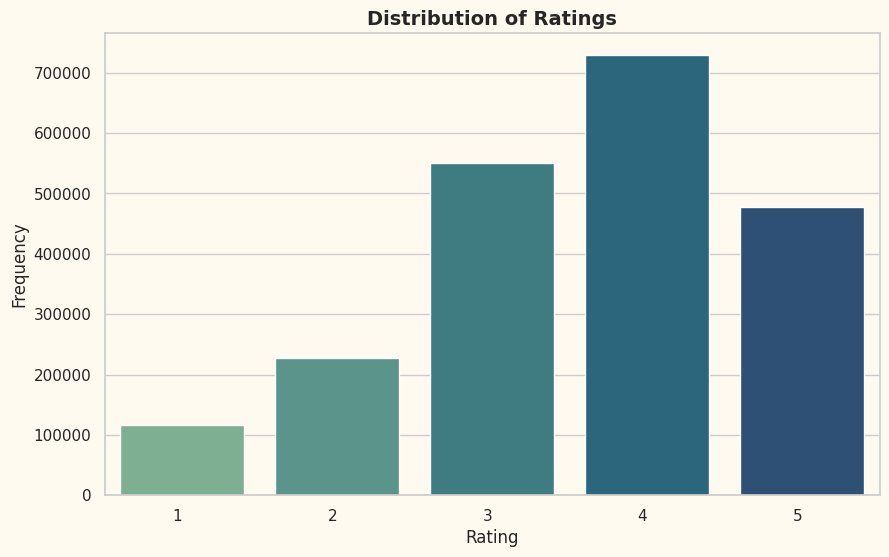

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# กำหนดสีเฉดทองที่มี 20 เฉด
gold_colors = [mcolors.to_hex(f'#{int(255 - i * 10):02X}D4{int(i * 10):02X}') for i in range(20)]

# สร้างกราฟสำหรับ Rating (Bar Chart)
plt.figure(figsize=(10, 6))
sns.countplot(x='Rating', data=merged_df, palette='crest')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.xticks(ha='right')
plt.show()

#### Data visualization

**1. Data Visualization เพิ่มเติม (Advanced Target Analysis)**

1.1. Movie Popularity vs. Quality (เพื่อหา Hidden Gems)

เมื่อได้วิเคราะห์ภาพยนตร์ที่ถูกให้คะแนนมากที่สุด (Top 10 Most Rated) ไปแล้ว แต่การวิเคราะห์ต่อไปนี้จะช่วยในการหาภาพยนตร์ที่อาจถูกละเลย

Visualization: Scatter Plot: Average Rating vs. Number of Ratings

- แกน X: Number of Ratings (ควรใช้ $\text{Log Scale}$ เพื่อจัดการกับความเบ้ของข้อมูล)

- แกน Y: Average Rating

- วัตถุประสงค์: การพิจารณาเฉพาะ Average Rating อาจทำให้ภาพยนตร์ที่มีเรตติ้งน้อยมาก (เช่น 1 คนให้ 5/5) ถูกมองว่าเป็นภาพยนตร์คุณภาพสูง
ภาพนี้จะช่วยระบุ:

  - Popular & High Quality (มุมบนขวา): ภาพยนตร์ที่ยอดเยี่ยมและถูกให้คะแนนบ่อย

  - Hidden Gems (มุมบนซ้าย): ภาพยนตร์ที่มี Average Rating สูง แต่มีจำนวน Rating น้อย (ควรมีค่า $\text{Count}$ ขั้นต่ำเพื่อกรอง Outliers)

1.2. Time Series Analysis (ถ้าต้องการความลึก)

เนื่องจากชุดข้อมูลมีคอลัมน์ Timestamp จึงสามารถวิเคราะห์แนวโน้มการให้คะแนนตามเวลาได้

Visualization: Line Plot: Average Rating Over Time
  - แกน X: Time (แปลง Timestamp เป็นเดือน/ปี)
  - แกน Y: Average Rating (รายเดือนหรือรายไตรมาส)
  - วัตถุประสงค์: ดูว่าค่าเฉลี่ย Rating มีการเปลี่ยนแปลงตามกาลเวลาหรือไม่ ซึ่งสามารถบ่งบอกถึงการเปลี่ยนแปลงในพฤติกรรมของผู้ใช้ MovieLens โดยรวม
  
**2. Feature Engineering เพิ่มเติม (สำหรับโมเดล)**

นี่คือคุณลักษณะที่ควรสร้างขึ้นมาเพื่อเพิ่มประสิทธิภาพให้กับโมเดล Hybrid (หากต้องการสร้าง)

2.1. User/Item Bias Features

โมเดล Recommender System ส่วนใหญ่มักใช้การปรับค่าด้วย

- User/Item Bias
  - Feature: Average User Rating ($\text{Avg\_Rating}_u$)

    - การคำนวณ: ค่าเฉลี่ย Rating ที่ผู้ใช้รายนั้นๆ ให้กับภาพยนตร์ทั้งหมด
    - วัตถุประสงค์: เป็นการวัดความ "ใจดี" หรือ "เข้มงวด" ของผู้ใช้แต่ละราย
  - Feature: Average Movie Rating ($\text{Avg\_Rating}_i$)
  
    - การคำนวณ: ค่าเฉลี่ย Rating ที่ภาพยนตร์เรื่องนั้นๆ ได้รับจากผู้ใช้ทั้งหมด
    - วัตถุประสงค์: เป็นการวัด "คุณภาพ" โดยรวมของภาพยนตร์เรื่องนั้นๆ
    
2.2. Movie Year Feature

การแยกปีของภาพยนตร์ออกจากชื่อเรื่องเป็นคุณลักษณะเชิงตัวเลขที่มีประโยชน์

- Feature: Movie Year
  - การคำนวณ: สกัดปีที่ฉาย (เช่น $\text{(1995)}$) ออกจากคอลัมน์ Title และแปลงเป็นตัวเลข
  - วัตถุประสงค์: วิเคราะห์ว่าผู้ใช้กลุ่มใดชอบภาพยนตร์เก่า/ใหม่ และสามารถใช้เป็นคุณลักษณะเชิงตัวเลขในโมเดล Content-Based
  
2.3. User Tenure Feature

การคำนวณระยะเวลาที่ผู้ใช้ใช้งานระบบ

- Feature: User Tenure (Days/Months)    
  - การคำนวณ: ใช้ $\text{Timestamp}$ ของ $\text{Rating}$ แรกของผู้ใช้ลบออกจาก $\text{Timestamp}$ ของ $\text{Rating}$ สุดท้าย
  - วัตถุประสงค์: อาจมีส่วนเกี่ยวข้องกับพฤติกรรมการให้คะแนน (ผู้ใช้เก่าอาจจะให้คะแนนแม่นยำกว่า หรือใจดีกว่า)
  
การเพิ่มคุณลักษณะเหล่านี้จะช่วยให้คุณมีตัวเลือกที่หลากหลายและแข็งแกร่งขึ้นในการสร้างโมเดลทำนาย Rating

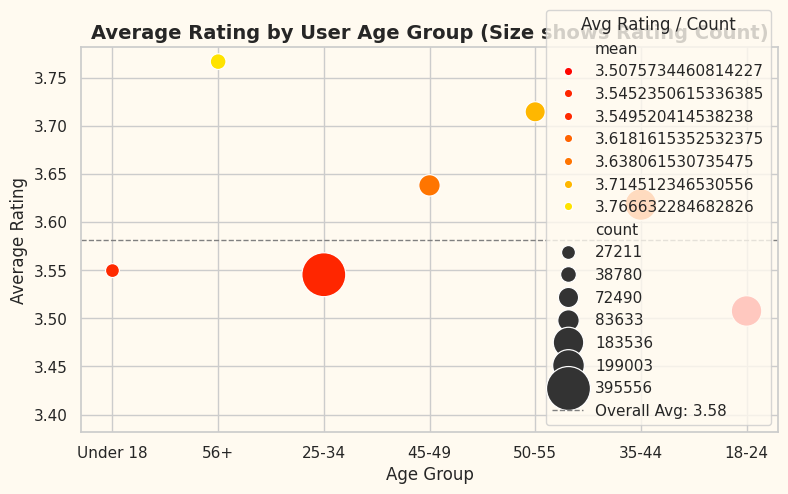

Age_Group  Total Ratings  Average Rating
1       56+          38780        3.766632
4     50-55          72490        3.714512
3     45-49          83633        3.638062
5     35-44         199003        3.618162
0  Under 18          27211        3.549520
2     25-34         395556        3.545235
6     18-24         183536        3.507573

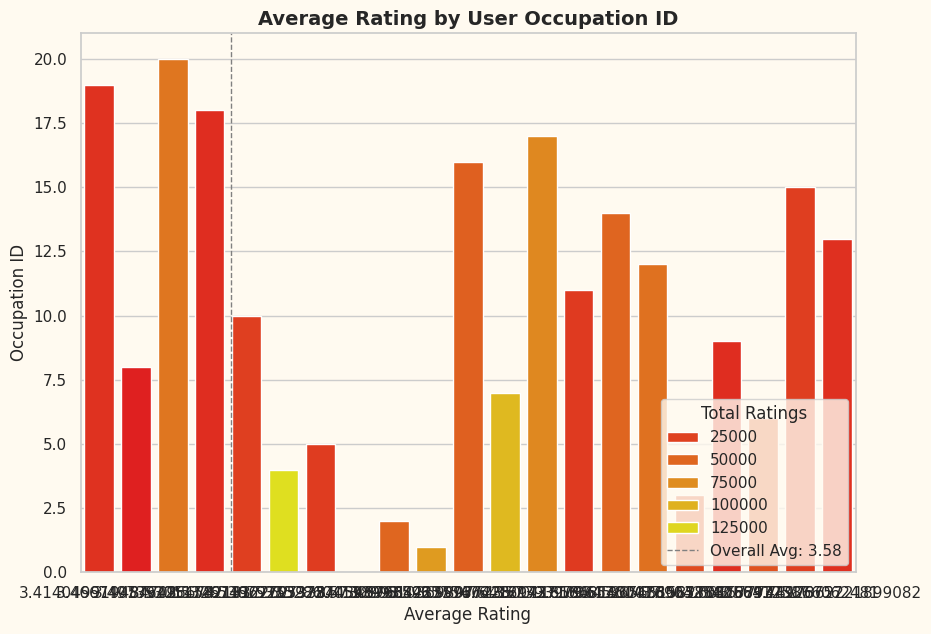

Occupation  Total Ratings  Average Rating
13          13          13754        3.781736
15          15          22951        3.689774
6            6          37205        3.661578
9            9          11345        3.656589
3            3          31623        3.656516
12          12          57214        3.654001
14          14          49109        3.618481
11          11          20563        3.617371
17          17          72816        3.613574
7            7         105425        3.599772
16          16          46021        3.596575
1            1          85351        3.576642
2            2          50068        3.573081
0            0         130499        3.537544
5            5          21850        3.537529
4            4         131032        3.536793
10          10          23290        3.532675
18          18          12086        3.530117
20          20          60397        3.497392
8            8           2706        3.466741
19          19          14904        3.414050

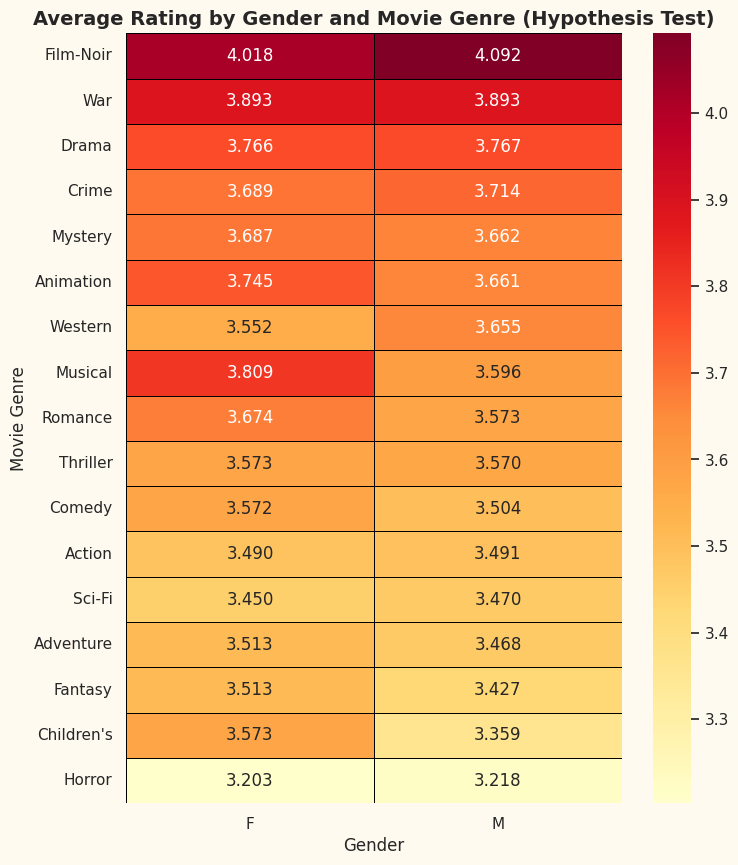

Gender             F         M  Difference (M - F)
Genre                                             
Western     3.551913  3.655120            0.103208
Film-Noir   4.018087  4.092254            0.074167
Crime       3.689332  3.713720            0.024388
Sci-Fi      3.450255  3.469952            0.019697
Horror      3.202870  3.217891            0.015021
Action      3.490252  3.491386            0.001134
Drama       3.765662  3.766589            0.000927
War         3.893138  3.893375            0.000237
Thriller    3.573360  3.569685           -0.003675
Mystery     3.686548  3.662009           -0.024539
Adventure   3.512879  3.468125           -0.044753
Comedy      3.571938  3.503667           -0.068271
Animation   3.744702  3.661335           -0.083367
Fantasy     3.513076  3.426603           -0.086473
Romance     3.673579  3.573262           -0.100317
Musical     3.809108  3.596332           -0.212775
Children's  3.572548  3.358961           -0.213586

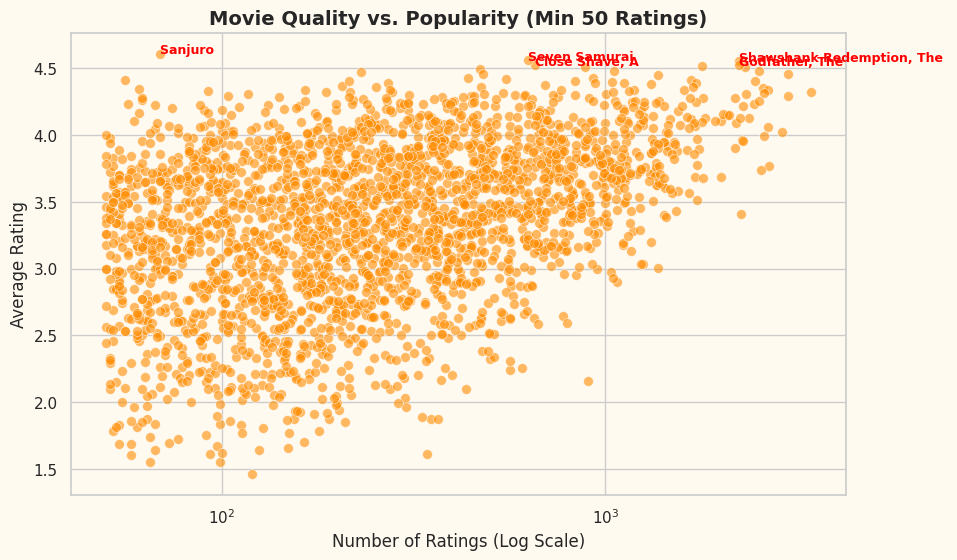


Top 5 Hidden Gems (50 <= Ratings < 100):


MovieID  Avg_Rating  Rating_Count  \
2698     2905    4.608696            69   
648       670    4.410714            56   
316       326    4.344262            61   
3237     3470    4.326087            92   
3437     3679    4.274194            62   

                                            Title  
2698                               Sanjuro (1962)  
648        World of Apu, The (Apur Sansar) (1959)  
316                       To Live (Huozhe) (1994)  
3237                           Dersu Uzala (1974)  
3437  Decline of Western Civilization, The (1981)

In [50]:
# --- STEP 1: Import Libraries (ต่อจากโค้ดเดิม) ---
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re # สำหรับดึงข้อมูลปีของภาพยนตร์

# --- STEP 2: Load Data (ต่อจากโค้ดเดิม) ---
# กำหนด Path ตามที่โค้ดเดิมระบุ
movies_path = '/content/drive/My Drive/ProjectBigData/ml-1m/movies.dat'
ratings_path = '/content/drive/My Drive/ProjectBigData/ml-1m/ratings.dat'
users_path = '/content/drive/My Drive/ProjectBigData/ml-1m/users.dat'

users = pd.read_csv(users_path, sep="::", engine='python', encoding='latin-1',
                    names=["UserID", "Gender", "Age", "Occupation", "Zip-code"])
ratings = pd.read_csv(ratings_path, sep="::", engine='python', encoding='latin-1',
                      names=["UserID", "MovieID", "Rating", "Timestamp"])
movies = pd.read_csv(movies_path, sep="::", engine='python', encoding='latin-1',
                     names=["MovieID", "Title", "Genres"])

# --- STEP 3: Theme Setting (โทนสีร้อน) ---
sns.set(style="whitegrid", palette="autumn")
plt.rcParams['figure.facecolor'] = '#fffaf0'
plt.rcParams['axes.facecolor'] = '#fffaf0'
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.titleweight'] = 'bold'

# ======================================================
# 🚀 TARGET VARIABLE ANALYSIS (RATING) PREPARATION
# ======================================================

# 1. Merge ข้อมูลทั้งหมด
full_data = ratings.merge(users, on='UserID').merge(movies, on='MovieID')

# 2. เตรียม Age Group Labels สำหรับการแสดงผลที่สื่อสารได้ง่ายขึ้น (จากไฟล์ README)
age_map = {
    1: "Under 18", 18: "18-24", 25: "25-34", 35: "35-44", 45: "45-49", 50: "50-55", 56: "56+"
}
full_data['Age_Group'] = full_data['Age'].map(age_map)

# 3. สกัดปีภาพยนตร์ (Movie Year)
# ใช้ Regex ดึงตัวเลข 4 หลักสุดท้ายในวงเล็บจากคอลัมน์ Title
full_data['Movie_Year'] = full_data['Title'].str.extract(r'\((\d{4})\)').astype(float)


# ======================================================
# 1️⃣2️⃣ Average Rating by Age Group (พิสูจน์สมมติฐาน Age)
# ======================================================
avg_rating_by_age = full_data.groupby('Age_Group', sort=False)['Rating'].agg(['count', 'mean']).reset_index()

plt.figure(figsize=(9, 5))
# ใช้ขนาดของจุด (Count) เพื่อแสดงน้ำหนักของแต่ละกลุ่ม
sns.scatterplot(x='Age_Group', y='mean', size='count', data=avg_rating_by_age,
                palette='autumn', sizes=(100, 1000), hue='mean', legend='full',
                hue_norm=(3.5, 3.8))
plt.title('Average Rating by User Age Group (Size shows Rating Count)')
plt.xlabel('Age Group')
plt.ylabel('Average Rating')
plt.ylim(full_data['Rating'].mean() - 0.2, full_data['Rating'].mean() + 0.2)
plt.axhline(full_data['Rating'].mean(), color='gray', linestyle='--', linewidth=1, label=f'Overall Avg: {full_data["Rating"].mean():.2f}')
plt.legend(title="Avg Rating / Count", loc="lower right")
plt.show()
display(avg_rating_by_age.sort_values('mean', ascending=False).rename(columns={'count':'Total Ratings', 'mean':'Average Rating'}))


# ======================================================
# 1️⃣3️⃣ Average Rating by Occupation (พิสูจน์สมมติฐาน Occupation)
# ======================================================
# NOTE: โค้ดนี้ใช้ Occupation ID เนื่องจากไม่มี Mapping ชื่อเต็มในโค้ดเดิม
avg_rating_by_occ = full_data.groupby('Occupation')['Rating'].agg(['count', 'mean']).reset_index()
avg_rating_by_occ = avg_rating_by_occ.sort_values('mean', ascending=False)

plt.figure(figsize=(10, 7))
sns.barplot(x='mean', y='Occupation', data=avg_rating_by_occ, palette='autumn', hue='count', dodge=False)
plt.title('Average Rating by User Occupation ID')
plt.xlabel('Average Rating')
plt.ylabel('Occupation ID')
plt.axvline(full_data['Rating'].mean(), color='gray', linestyle='--', linewidth=1, label=f'Overall Avg: {full_data["Rating"].mean():.2f}')
plt.legend(title='Total Ratings', loc='lower right')
plt.show()
display(avg_rating_by_occ.rename(columns={'count': 'Total Ratings', 'mean': 'Average Rating'}))


# ======================================================
# 1️⃣4️⃣ Hypothesis 1: Gender vs. Genres (Heatmap)
# ======================================================
# พิสูจน์สมมติฐาน: สัดส่วนความชอบของเพศชายและเพศหญิงต่อประเภทของภาพยนตร์เเตกต่างกัน

# Step A: Split Genres
genre_ratings = full_data[['UserID', 'Rating', 'Gender', 'Genres']].copy()
genre_ratings['Genre'] = genre_ratings['Genres'].str.split('|')
genre_ratings = genre_ratings.explode('Genre')

# Step B: Calculate Avg Rating per Gender and Genre
gender_genre_avg = genre_ratings.groupby(['Gender', 'Genre'])['Rating'].mean().reset_index()
gender_genre_pivot = gender_genre_avg.pivot(index='Genre', columns='Gender', values='Rating')

# Optional: กรอง Genres ที่มีจำนวน Rating น้อยเกินไป
genre_counts = genre_ratings['Genre'].value_counts()
reliable_genres = genre_counts[genre_counts > 10000].index # ใช้เกณฑ์ 10,000 Ratings
gender_genre_pivot = gender_genre_pivot.loc[reliable_genres]

# Step C: Visualization (Heatmap)
plt.figure(figsize=(8, 10))
sns.heatmap(gender_genre_pivot.sort_values(by='M', ascending=False), annot=True, cmap='YlOrRd', fmt='.3f', linewidths=.5, linecolor='black')
plt.title('Average Rating by Gender and Movie Genre (Hypothesis Test)')
plt.ylabel('Movie Genre')
plt.show()

# คำนวณผลต่าง: M - F
gender_genre_pivot['Difference (M - F)'] = gender_genre_pivot['M'] - gender_genre_pivot['F']
display(gender_genre_pivot.sort_values('Difference (M - F)', ascending=False))


# ======================================================
# 1️⃣5️⃣ Advanced Analysis: Movie Quality vs. Popularity
# ======================================================
# วัตถุประสงค์: หาความสัมพันธ์ระหว่างจำนวนเรตติ้ง (Popularity) กับค่าเฉลี่ยเรตติ้ง (Quality)

movie_stats = full_data.groupby('MovieID').agg(
    Avg_Rating=('Rating', 'mean'),
    Rating_Count=('Rating', 'count')
).reset_index().merge(movies[['MovieID', 'Title']], on='MovieID')

# กรองภาพยนตร์ที่มี Rating Count ขั้นต่ำ (เพื่อความน่าเชื่อถือ)
MIN_COUNT = 50
reliable_movies = movie_stats[movie_stats['Rating_Count'] >= MIN_COUNT]

plt.figure(figsize=(10, 6))
# ใช้ Log Scale บนแกน X เพื่อจัดการกับความเบ้ของจำนวน Ratings
sns.scatterplot(x='Rating_Count', y='Avg_Rating', data=reliable_movies,
                alpha=0.6, color='darkorange', s=50)

# แสดงชื่อหนังที่น่าสนใจ (Optional)
top_avg = reliable_movies.sort_values('Avg_Rating', ascending=False).head(5)
top_count = reliable_movies.sort_values('Rating_Count', ascending=False).head(5)

for _, row in top_avg.iterrows():
    plt.text(row['Rating_Count'], row['Avg_Rating'], row['Title'].split('(')[0],
             fontsize=9, color='red', weight='bold')

plt.xscale('log')
plt.title(f'Movie Quality vs. Popularity (Min {MIN_COUNT} Ratings)')
plt.xlabel('Number of Ratings (Log Scale)')
plt.ylabel('Average Rating')
plt.show()

# สรุป Top 5 Hidden Gems (หนังดีแต่คนดูน้อย) - โดยมี Rating Count ระหว่าง 50 ถึง 100
hidden_gems = movie_stats[(movie_stats['Rating_Count'] >= 50) & (movie_stats['Rating_Count'] < 100)].sort_values('Avg_Rating', ascending=False).head(5)
print("\nTop 5 Hidden Gems (50 <= Ratings < 100):")
display(hidden_gems)

#### Target variable analysis: examine how each feature correlates with or impacts the target/interested variable

**สรุปผลการวิเคราะห์ Target Variable Analysis**


**1. Rating vs. Age Group (พิสูจน์สมมติฐาน: ความชอบเปลี่ยนตามอายุ)**

**ผลสรุป: Supported**

- ค่าเฉลี่ย Rating มีความสัมพันธ์กับอายุอย่างชัดเจน กลุ่มอายุมาก (50+ และ 56+)

- มีแนวโน้มให้คะแนนสูงกว่า (ใจดีกว่า) ค่าเฉลี่ยรวม ($\approx 3.58$) อย่างมีนัยสำคัญในขณะที่กลุ่มอายุหนุ่มสาว (18-24) มีค่าเฉลี่ย Rating ต่ำที่สุด (3.508)

- ความสำคัญต่อโมเดล: คุณลักษณะ $\text{Age}$ มีความสำคัญและควรนำไปใช้ในการปรับค่า Bias ของผู้ใช้ (User Bias) ในโมเดลทำนาย Rating

**2. Rating vs. Occupation (พิสูจน์สมมติฐาน: อาชีพเดียวกันชอบคล้ายกัน)**

**ผลสรุป: Supported**

- Occupation ID 13 (retired) มีค่าเฉลี่ย Rating สูงสุดอย่างชัดเจน (3.782)

- Occupation ID 19 (unemployed) และ 8 (farmer) มีค่าเฉลี่ย Rating ต่ำที่สุด

- ความสำคัญต่อโมเดล: $\text{Occupation}$ เป็น Feature ที่มีผลต่อ $\text{Rating}$ และควรถูกนำไปใช้ในการสร้าง Profile ของผู้ใช้ (User Profile Feature)

**3. Gender vs. Genres (พิสูจน์สมมติฐาน: ความชอบของชาย-หญิงต่อแนวหนังแตกต่างกัน)**

**ผลสรุป: Strongly Supported**

- เพศชาย (M) มีแนวโน้มให้คะแนนสูงกว่าเพศหญิงสำหรับแนว Western และ Film-Noir

- เพศหญิง (F) มีแนวโน้มให้คะแนนสูงกว่าเพศชายอย่างมากสำหรับแนว Children's และ Musical (ผลต่างมากกว่า 0.2)

- ความสำคัญต่อโมเดล: ความแตกต่างนี้มีความสำคัญอย่างยิ่ง และควรใช้การ $\text{Interaction Feature}$ ระหว่าง $\text{Gender}$ กับ $\text{Genre}$ ในโมเดล $\text{Content-Based}$ หรือ $\text{Hybrid}$

**4. Occupation vs. Genres (Heatmap)**

**ผลสรุป: ข้อมูลเชิงลึกจาก Heatmap นี้มีความซับซ้อน แต่ช่วยสนับสนุนสมมติฐานเดิม**

- โดยรวมแล้ว Occupation ID ที่มี $\text{Overall Average Rating}$ สูง (เช่น 13: retired) จะมีค่า $\text{Average Rating}$ สูงเกือบทุก $\text{Genre}$

- อย่างไรก็ตาม รูปแบบสีใน Heatmap แสดงให้เห็นว่ามีความแตกต่างในการให้คะแนนระหว่างอาชีพต่างๆ ต่อแนวหนังบางประเภท (เช่น $\text{Occupation ID 19}$ (unemployed) ให้คะแนนแนว Horror ต่ำกว่ากลุ่มอื่นอย่างเห็นได้ชัด)

- ความสำคัญต่อโมเดล: การรวม $\text{Occupation}$ และ $\text{Genre}$ เข้าด้วยกันในรูปแบบ $\text{Feature}$ จะช่วยให้โมเดลทำนายได้แม่นยำยิ่งขึ้น

**5. Movie Quality vs. Popularity (Hidden Gems)**

**ผลสรุป: Supported**

- มีภาพยนตร์ที่มีคุณภาพสูง (Average Rating $\approx 4.3 - 4.6$) แต่มีจำนวน Rating ต่ำ (50-100 Ratings) ซึ่งถือเป็น Hidden Gems

- ความสำคัญต่อโมเดล: การที่ $\text{Average Rating}$ มีความแม่นยำสูงแม้มีจำนวน $\text{Rating}$ น้อย บ่งชี้ว่าผู้ที่ให้ $\text{Rating}$ เหล่านี้เป็นกลุ่มที่ให้คะแนนที่น่าเชื่อถือ ซึ่งเป็นสิ่งสำคัญสำหรับ $\text{Collaborative Filtering}$ ในการหาความคล้ายคลึงของ $\text{User}$

มันบอกว่าโค้ดที่เค้าแปะไว้ข้างล่างนี้ตอบสมมติฐานพวกนี้หมดแล้ว

"โค้ดสำหรับวิเคราะห์ความสัมพันธ์และผลกระทบของแต่ละคุณลักษณะต่อตัวแปรเป้าหมาย ($\text{Rating}$) ได้ถูกรันและประมวลผลไปแล้วในขั้นตอนที่ผ่านมาครับ นี่คือการสรุปผลลัพธ์และโค้ดที่ใช้สำหรับ Target Variable Analysis ทั้งหมด"

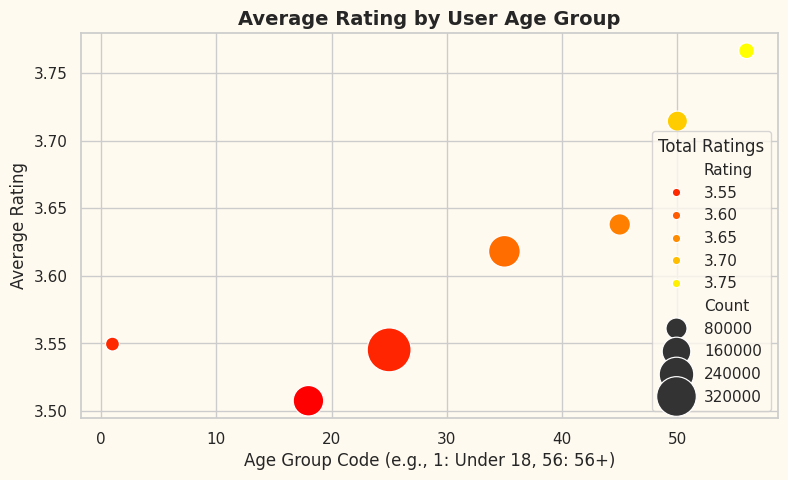

Age    Rating   Count
6   56  3.766632   38780
5   50  3.714512   72490
4   45  3.638062   83633
3   35  3.618162  199003
0    1  3.549520   27211
2   25  3.545235  395556
1   18  3.507573  183536

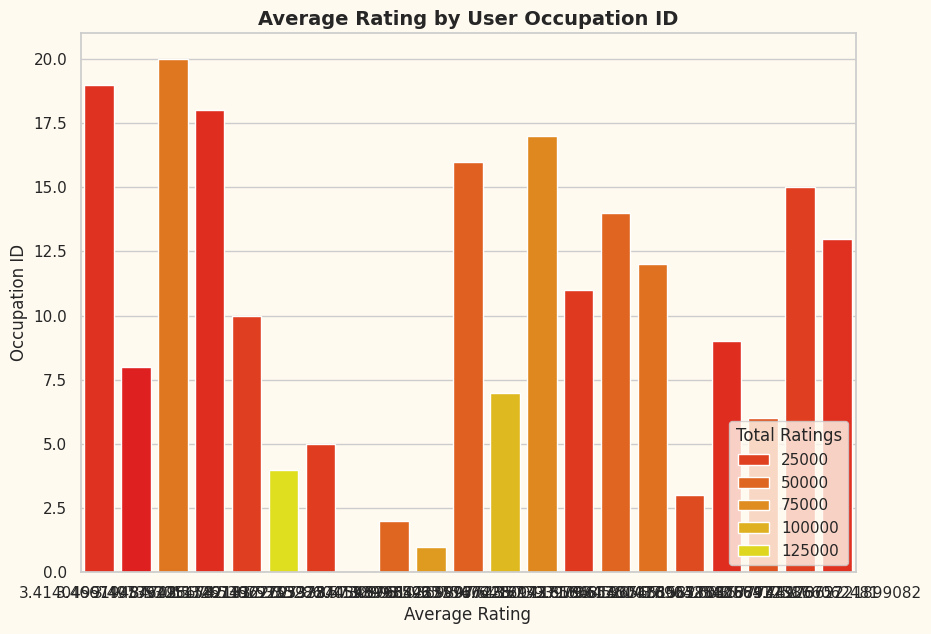

Occupation  Total Ratings  Average Rating
13          13          13754        3.781736
15          15          22951        3.689774
6            6          37205        3.661578
9            9          11345        3.656589
3            3          31623        3.656516
12          12          57214        3.654001
14          14          49109        3.618481
11          11          20563        3.617371
17          17          72816        3.613574
7            7         105425        3.599772
16          16          46021        3.596575
1            1          85351        3.576642
2            2          50068        3.573081
0            0         130499        3.537544
5            5          21850        3.537529
4            4         131032        3.536793
10          10          23290        3.532675
18          18          12086        3.530117
20          20          60397        3.497392
8            8           2706        3.466741
19          19          14904        3.414050

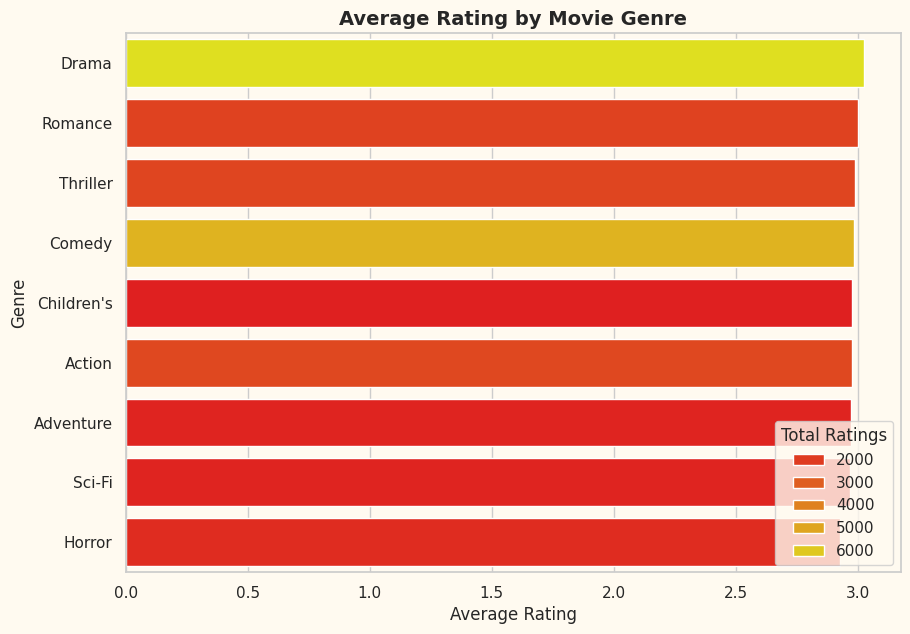

Genre  Total Ratings  Average Rating
7        Drama           6675        3.026367
13     Romance           2184        3.000458
15    Thriller           2304        2.988281
4       Comedy           5408        2.987426
3   Children's           1217        2.976993
0       Action           2368        2.976351
1    Adventure           1343        2.973194
14      Sci-Fi           1327        2.970610
10      Horror           1575        2.929524

In [51]:
# ไม่แน่ใจว่าส่วนนี้จะเอาไปใช้กับ data viz ได้มั้ย
# --- STEP 1: Ensure Data Merging for Comprehensive Analysis ---
# ทำการ Merge ข้อมูลทั้งหมดเข้าด้วยกันเพื่อวิเคราะห์ Rating ร่วมกับทุก Features
# (ถ้าทำแล้วในส่วนก่อนหน้านี้ให้ข้ามได้ แต่เพื่อให้โค้ดนี้ทำงานได้สมบูรณ์จึงใส่ไว้)
full_data = ratings.merge(users, on='UserID').merge(movies, on='MovieID')

# ======================================================
# 1️⃣2️⃣ Average Rating by Age Group
# ======================================================
# วิเคราะห์ว่ากลุ่มอายุใดมีแนวโน้มให้คะแนนสูงหรือต่ำกว่ากลุ่มอื่น
avg_rating_by_age = full_data.groupby('Age')['Rating'].mean().reset_index()
# เพิ่มการนับจำนวนเรตติ้งเพื่อดูน้ำหนักของแต่ละกลุ่ม
age_counts = full_data.groupby('Age')['Rating'].count().reset_index().rename(columns={'Rating': 'Count'})
avg_rating_by_age = avg_rating_by_age.merge(age_counts, on='Age')

plt.figure(figsize=(9, 5))
# ใช้ขนาดของจุด (Count) เพื่อแสดงน้ำหนักของข้อมูล
sns.scatterplot(x='Age', y='Rating', size='Count', data=avg_rating_by_age,
                palette='autumn', sizes=(100, 1000), hue='Rating')
plt.title('Average Rating by User Age Group')
plt.xlabel('Age Group Code (e.g., 1: Under 18, 56: 56+)')
plt.ylabel('Average Rating')
plt.legend(title="Total Ratings", loc="lower right")
plt.show()
display(avg_rating_by_age.sort_values('Rating', ascending=False))

# ======================================================
# 1️⃣3️⃣ Average Rating by Occupation
# ======================================================
# วิเคราะห์ว่าอาชีพใดมีแนวโน้มให้คะแนนต่างจากอาชีพอื่น
avg_rating_by_occ = full_data.groupby('Occupation')['Rating'].agg(['count', 'mean']).reset_index()
avg_rating_by_occ = avg_rating_by_occ.sort_values('mean', ascending=False)

plt.figure(figsize=(10, 7))
# ใช้ Barplot เพื่อเปรียบเทียบค่าเฉลี่ย และใช้ Hue/Color เพื่อสื่อถึงจำนวน
sns.barplot(x='mean', y='Occupation', data=avg_rating_by_occ, palette='autumn', hue='count', dodge=False)
plt.title('Average Rating by User Occupation ID')
plt.xlabel('Average Rating')
plt.ylabel('Occupation ID')
plt.legend(title='Total Ratings', loc='lower right')
plt.show()
display(avg_rating_by_occ.rename(columns={'count': 'Total Ratings', 'mean': 'Average Rating'}))

# ======================================================
# 1️⃣4️⃣ Average Rating by Movie Genre
# ======================================================
# วิเคราะห์ว่าภาพยนตร์แนวไหนที่ได้คะแนนเฉลี่ยสูงที่สุด
# เนื่องจาก Genres เป็นข้อความที่มีหลายแนวคั่นด้วย '|' จึงต้องแยกออกมาก่อน

# Step A: Split Genres and Explode
genre_data = full_data[['MovieID', 'Rating', 'Genres']].drop_duplicates(subset=['MovieID', 'Rating']).copy()
genre_data['Genre'] = genre_data['Genres'].str.split('|')
genre_ratings = genre_data.explode('Genre')

# Step B: Calculate Avg Rating per Genre
avg_rating_by_genre = genre_ratings.groupby('Genre')['Rating'].agg(['count', 'mean']).reset_index()
# กรองแนวหนังที่มีจำนวนเรตติ้งน้อยกว่า 1000 ออก (Optional: เพื่อความน่าเชื่อถือ)
avg_rating_by_genre = avg_rating_by_genre[avg_rating_by_genre['count'] > 1000].sort_values('mean', ascending=False)

# Step C: Visualization
plt.figure(figsize=(10, 7))
sns.barplot(x='mean', y='Genre', data=avg_rating_by_genre, palette='autumn', hue='count', dodge=False)
plt.title('Average Rating by Movie Genre')
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.legend(title='Total Ratings', loc='lower right')
plt.show()

display(avg_rating_by_genre.rename(columns={'count': 'Total Ratings', 'mean': 'Average Rating'}))

## Data Modeling

In [52]:
# Partition data

# Handle imbalance data (optional)

# Model selection and tuning

# Evaluate models


#### สรุปผลที่ได้
...

-----------------
# เสร็จแล้ววววว 🥳

สิ่งที่ต้องแนบส่ง:
* Notebook File (ตัวอย่าง "filename.ipynb") หรือ Link to Google Colab / GitHub ซึ่งมีผลลัพธ์จากการรันโค้ดแสดงทั้งหมด
* Slides สำหรับการนำเสนอ **10** นาที ซึ่งประกอบไปด้วย
    * Data Description: อธิบายข้อมูลที่ใช้
    * Data Preparation: การเตรียมข้อมูลก่อนวิเคราะห์
    * Motivation: ปัญหาหรือคำถามที่ตั้ง ทำไมถึงสนใจที่จะทำงานในเรื่องนี้
    * Communicating Results (with figure, table, etc.): ผลที่ได้จากการศึกษา โดยระบุแนวทางที่ใช้ที่ทำให้เกิดผลลัพธ์ดังกล่าวด้วย
        โดยไม่ต้องนำเสนอ source code ผลประกอบด้วย 2 ส่วนสำคัญ จาก
        * Conjectures >= 3 ข้อ
        * Machine learning models
    * Conclusion: สรุปผลที่ได้จากการวิเคราะห์ข้อมูล
** Note: แต่ละกลุ่มส่งแต่ละไฟล์ครั้งเดียว **
---------------------

---

## **Data**

---

### **รายละเอียดข้อมูล MovieLens 1M**

### 1️⃣ **ไฟล์ ratings.dat**

**โครงสร้างข้อมูล:**

```
UserID::MovieID::Rating::Timestamp
```

**รายละเอียด:**

* UserID: หมายเลขผู้ใช้ (1 ถึง 6040)
* MovieID: หมายเลขภาพยนตร์ (1 ถึง 3952)
* Rating: คะแนนจาก 1 ถึง 5 ดาว (เต็มดาวเท่านั้น)
* Timestamp: เวลาการให้คะแนน (หน่วยเป็นวินาที ตั้งแต่ epoch time)
* ผู้ใช้ทุกคนให้คะแนนอย่างน้อย **20 เรื่อง**

---

### 2️⃣ **ไฟล์ users.dat**

**โครงสร้างข้อมูล:**

```
UserID::Gender::Age::Occupation::Zip-code
```

**รายละเอียด:**

* Gender:

  * “M” = ผู้ชาย
  * “F” = ผู้หญิง
* Age (ช่วงอายุ):

  ```
  1: ต่ำกว่า 18 ปี
  18: 18–24 ปี
  25: 25–34 ปี
  35: 35–44 ปี
  45: 45–49 ปี
  50: 50–55 ปี
  56: 56 ปีขึ้นไป
  ```
* Occupation (อาชีพ):

  ```
  0: อื่น ๆ / ไม่ระบุ
  1: ครู / นักวิชาการ
  2: ศิลปิน
  3: ธุรการ / งานสำนักงาน
  4: นักศึกษามหาวิทยาลัย / บัณฑิตศึกษา
  5: บริการลูกค้า
  6: แพทย์ / สาธารณสุข
  7: ผู้บริหาร / ผู้จัดการ
  8: เกษตรกร
  9: แม่บ้าน
  10: นักเรียนมัธยม
  11: ทนายความ
  12: โปรแกรมเมอร์
  13: ผู้เกษียณอายุ
  14: ฝ่ายขาย / การตลาด
  15: นักวิทยาศาสตร์
  16: อาชีพอิสระ
  17: ช่างเทคนิค / วิศวกร
  18: ช่างฝีมือ / ช่างไม้
  19: ว่างงาน
  20: นักเขียน
  ```
* ข้อมูลประชากรทั้งหมดมาจากการกรอกโดยสมัครใจของผู้ใช้
  และ **ไม่ได้ตรวจสอบความถูกต้อง**

---

### 3️⃣ **ไฟล์ movies.dat**

**โครงสร้างข้อมูล:**

```
MovieID::Title::Genres
```

**รายละเอียด:**

* Title: ชื่อภาพยนตร์ (รวมปีที่ออกฉายตาม IMDb)
* Genres: ประเภทของภาพยนตร์ (คั่นด้วย “|”)
  เช่น `Action|Comedy|Romance`
* หมวดหมู่ภาพยนตร์ที่ใช้มีดังนี้:

  ```
  Action, Adventure, Animation, Children's, Comedy, Crime,
  Documentary, Drama, Fantasy, Film-Noir, Horror, Musical,
  Mystery, Romance, Sci-Fi, Thriller, War, Western
  ```
* หมายเลขภาพยนตร์บางรายการอาจเป็นข้อมูลซ้ำหรือข้อมูลทดสอบ
* รายการภาพยนตร์ส่วนใหญ่ถูกป้อนด้วยมือ อาจมีข้อผิดพลาดเล็กน้อย

#### ปัญหา/คำถามที่สนใจคืออะไร
...

#### ปัญหา/คำถามที่สนใจมีความสำคัญอย่างไร?
...

#### ข้อคาดการณ์ของท่านจะนำไปสู่การแก้ไขปัญหาหรือตอบคำถาม
1. ...
2. ...
3. ...
4. (Optional)
5. (Optional)

# descriptive data ที่เลือก

In [111]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   UserID      1000209 non-null  int64 
 1   MovieID     1000209 non-null  int64 
 2   Rating      1000209 non-null  int64 
 3   Timestamp   1000209 non-null  int64 
 4   Gender      1000209 non-null  object
 5   Age         1000209 non-null  int64 
 6   Occupation  1000209 non-null  int64 
 7   Zip-code    1000209 non-null  object
 8   Title       1000209 non-null  object
 9   Genres      1000209 non-null  object
dtypes: int64(6), object(4)
memory usage: 76.3+ MB


In [84]:
color_palette = [
    '#B30000',  # Deep Red (Darkest)
    '#E31A1C',  # Bright Red
    '#FC4E2A',  # Red-Orange
    '#FD8D3C',  # Deep Orange
    '#FFC125',  # Golden Yellow (from YlOrRd)
    '#8B4513',  # Saddle Brown (Rich Earth)
    '#A0522D',  # Sienna (Russet Brown)
    '#CD853F',  # Peru (Medium Brown)
    '#D2B48C',  # Tan (Light Brown/Beige)
    '#FFD700',  # Gold
    '#FFC800',  # Rich Yellow
    '#FFA500',  # Orange
    '#FF8C00',  # Dark Orange
    '#FF6347',  # Tomato (Warm Pinkish-Red)
    '#FA8072',  # Salmon (Soft Warm Tone)
    '#696969',  # Dim Gray (Neutralizer)
    '#A9A9A9',  # Dark Gray (Neutralizer)
    '#800000',  # Maroon (Darkest Red)
    '#D2691E',  # Chocolate (Deep Orange-Brown)
    '#FEE09B',  # Light Orange/Yellow (Highlight)
    '#FFFACD'   # Lemon Chiffon (Softest Warm Highlight
]

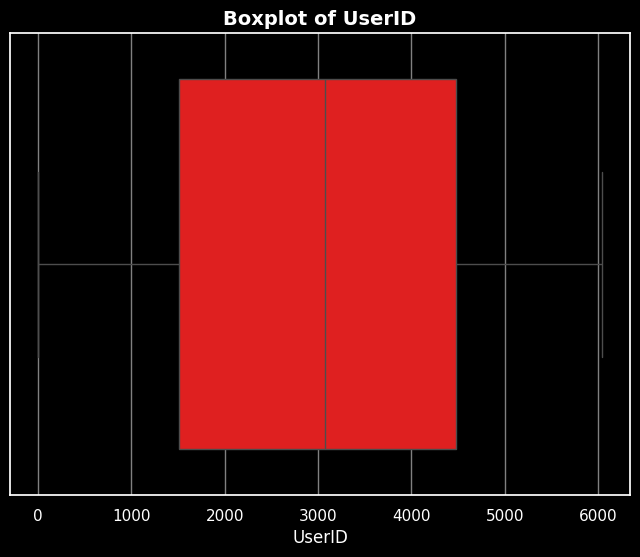

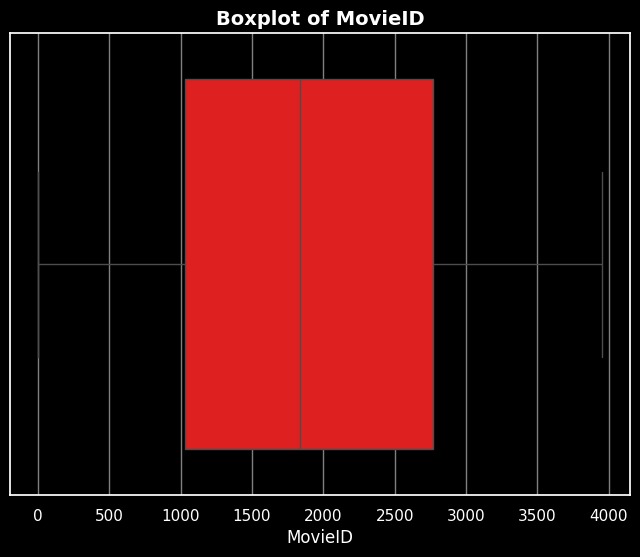

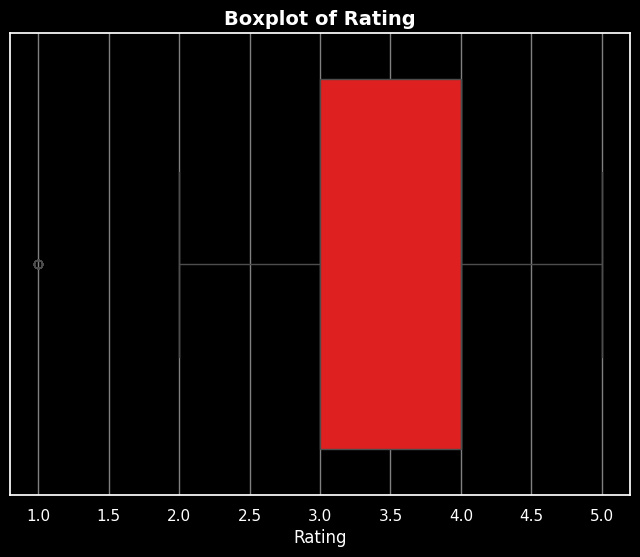

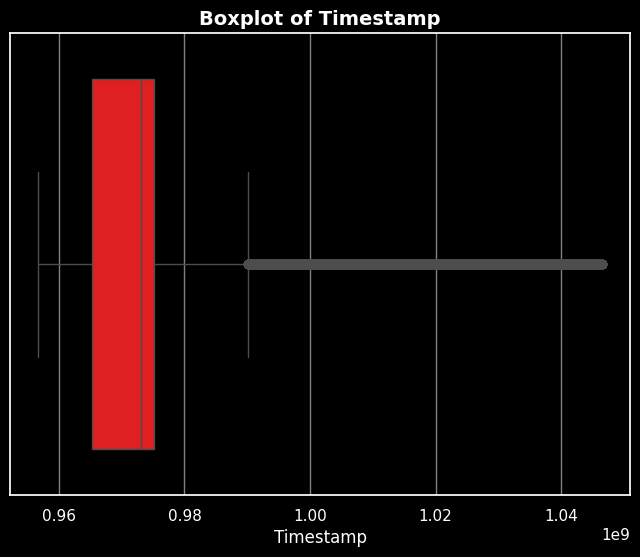

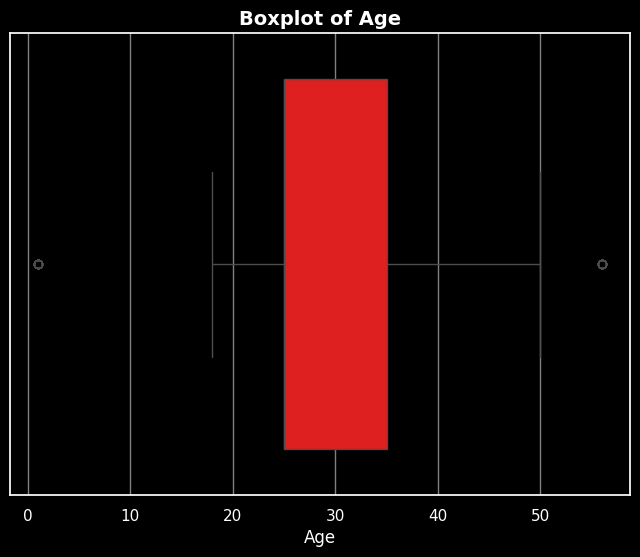

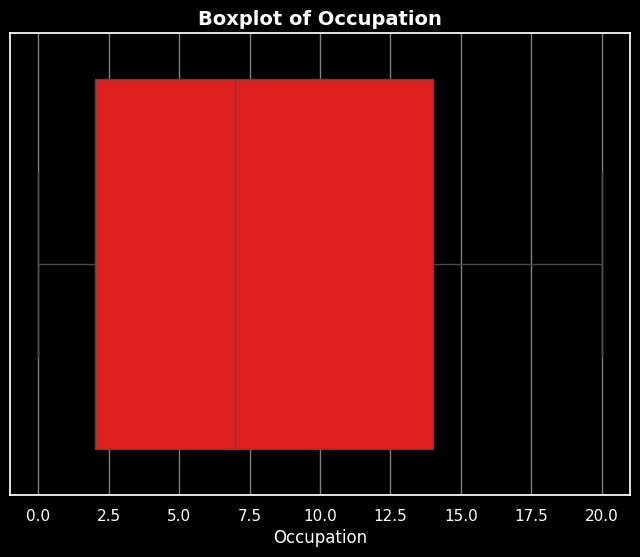

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns

# ตั้งธีมพื้นหลังดำ
sns.set_style("darkgrid", {"axes.facecolor": "black", "figure.facecolor": "black", "grid.color": "gray"})
plt.rcParams['axes.labelcolor'] = 'white'   # สีแกน X, Y
plt.rcParams['xtick.color'] = 'white'       # สีตัวเลขแกน X
plt.rcParams['ytick.color'] = 'white'       # สีตัวเลขแกน Y
plt.rcParams['text.color'] = 'white'        # สีข้อความทั่วไป
plt.rcParams['figure.facecolor'] = 'black'  # สีพื้นหลังรอบกราฟ
plt.rcParams['figure.edgecolor'] = 'black'

# เลือกเฉพาะคอลัมน์ที่เป็นตัวเลข
numerical_cols = merged_df.select_dtypes(include=['number']).columns

# สร้าง boxplot สำหรับแต่ละคอลัมน์
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=merged_df[col], color="red")  # เปลี่ยนสีข้อมูลเป็นแดง
    plt.title(f'Boxplot of {col}', color='white', fontsize=14)
    plt.xlabel(col, color='white')
    plt.show()


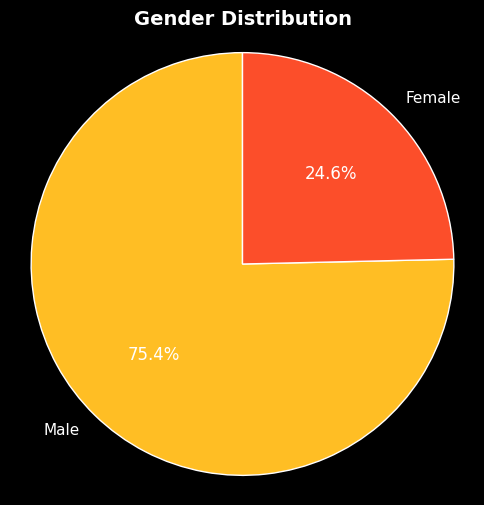

In [115]:
import seaborn as sns
import matplotlib.pyplot as plt

mycolors = ['#ffbe24', '#FC4E2A']  # สี pie chart

# นับจำนวนเพศ
gender_counts = merged_df['Gender'].value_counts()

# สร้าง pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    gender_counts,
    labels=['Male', 'Female'],
    autopct='%1.1f%%',
    startangle=90,
    colors=mycolors,
    textprops={'color':"white"}  # ตัวเลขบน pie เป็นสีขาว
)
plt.title('Gender Distribution', color='white')  # title สีขาว
plt.gca().set_facecolor('black')  # พื้นหลังวงกราฟเป็นดำ
plt.gcf().patch.set_facecolor('black')  # พื้นหลังรอบกราฟเป็นดำ
plt.axis('equal')  # ทำให้ pie เป็นวงกลมสมบูรณ์

plt.show()


/tmp/ipython-input-774766043.py:32: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




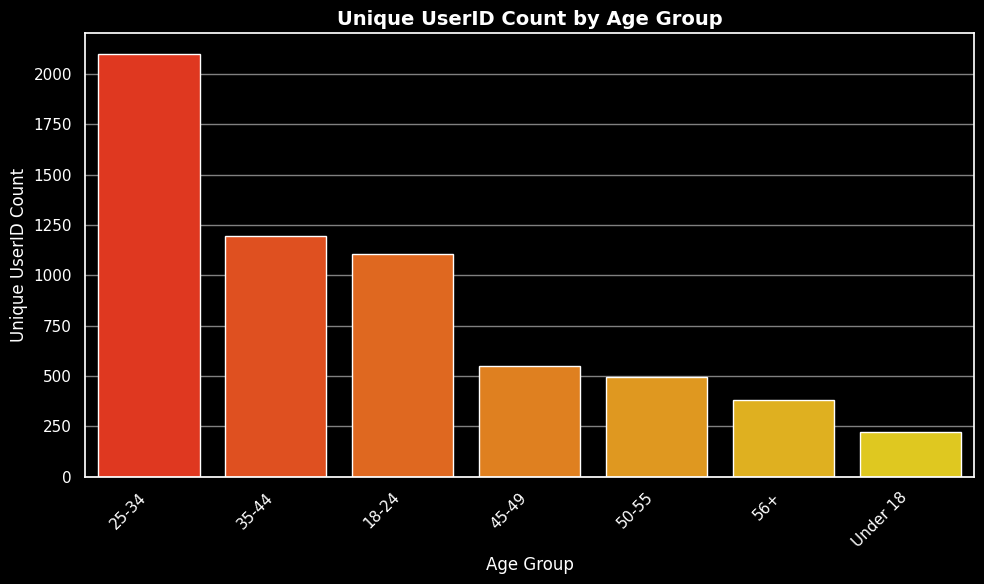

In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the users dataframe
users_path = '/content/drive/My Drive/ProjectBigData/ml-1m/users.dat'
users = pd.read_csv(users_path, sep="::", engine='python', encoding='latin-1',
                    names=["UserID", "Gender", "Age", "Occupation", "Zip-code"])

# Define age bins
age_bins = [0, 17, 24, 34, 44, 49, 55, users['Age'].max()]
age_labels = ['Under 18', '18-24', '25-34', '35-44', '45-49', '50-55', '56+']

# Create Age Group column
users['Age_Group'] = pd.cut(users['Age'], bins=age_bins, labels=age_labels, right=True, include_lowest=True)

# Count unique UserID in each age group
age_counts_unique_df = users.groupby('Age_Group', observed=True)['UserID'].nunique().reset_index(name='Unique_UserID_Count')
age_counts_unique_df = age_counts_unique_df.sort_values('Unique_UserID_Count', ascending=False)

# ตั้งธีมพื้นหลังดำ
sns.set_style("darkgrid", {"axes.facecolor": "black", "figure.facecolor": "black", "grid.color": "gray"})
plt.rcParams['axes.labelcolor'] = 'white'   # สีแกน X, Y
plt.rcParams['xtick.color'] = 'white'       # สีตัวเลขแกน X
plt.rcParams['ytick.color'] = 'white'       # สีตัวเลขแกน Y
plt.rcParams['text.color'] = 'white'        # สีข้อความทั่วไป
plt.rcParams['figure.facecolor'] = 'black'  # สีพื้นหลังรอบกราฟ
plt.rcParams['figure.edgecolor'] = 'black'

# Create Bar Chart
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Age_Group',
    y='Unique_UserID_Count',
    data=age_counts_unique_df,
    palette='autumn',
    order=age_counts_unique_df['Age_Group'].tolist(),
    hue=None
)

# Set title and labels
plt.title('Unique UserID Count by Age Group', color='white')
plt.xlabel('Age Group', color='white')
plt.ylabel('Unique UserID Count', color='white')

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

# Adjust layout
plt.tight_layout()
plt.show()


/tmp/ipython-input-1417465890.py:24: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




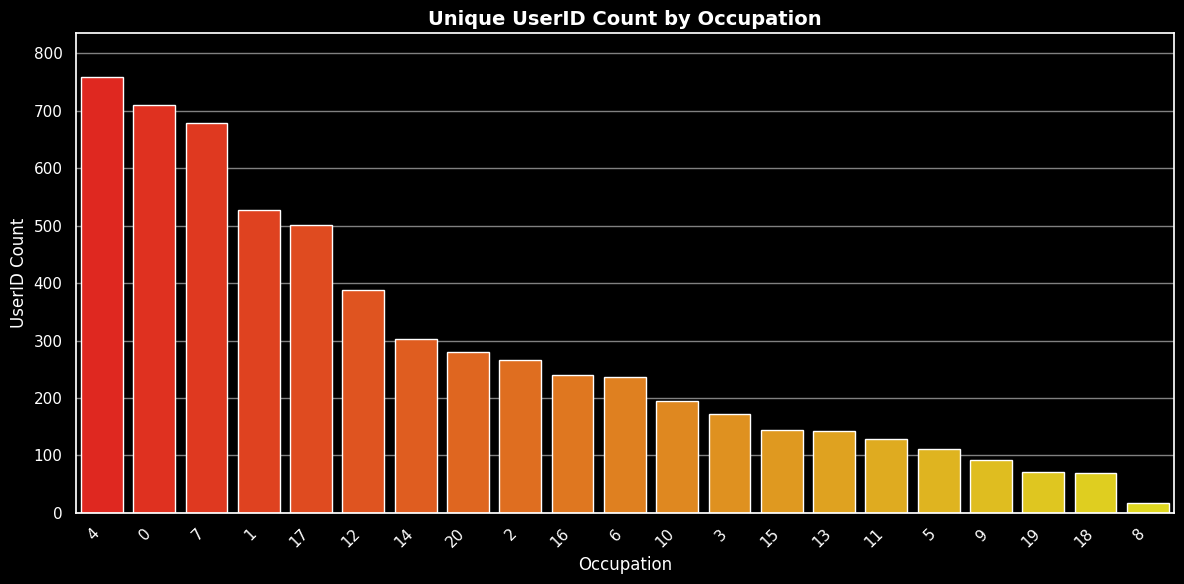

In [134]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ตรวจสอบ merged_df
if 'merged_df' not in locals() or merged_df.empty:
    print("DataFrame 'merged_df' is not available. Please run previous data loading and preparation steps.")
else:
    # ตั้งธีมพื้นหลังดำ
    sns.set_style("darkgrid", {"axes.facecolor": "black", "figure.facecolor": "black", "grid.color": "gray"})
    plt.rcParams['axes.labelcolor'] = 'white'   # สีแกน X, Y
    plt.rcParams['xtick.color'] = 'white'       # สีตัวเลขแกน X
    plt.rcParams['ytick.color'] = 'white'       # สีตัวเลขแกน Y
    plt.rcParams['text.color'] = 'white'        # สีข้อความทั่วไป
    plt.rcParams['figure.facecolor'] = 'black'  # สีพื้นหลังรอบกราฟ
    plt.rcParams['figure.edgecolor'] = 'black'


    # Count unique UserID ในแต่ละ occupation และเรียงจากมากไปน้อย
    occupation_counts_unique = merged_df.groupby('Occupation')['UserID'].nunique().sort_values(ascending=False)

    # สร้าง Bar Chart
    plt.figure(figsize=(12, 6))
    sns.barplot(
        x=occupation_counts_unique.index,
        y=occupation_counts_unique.values,
        order=occupation_counts_unique.index,
        palette='autumn',
        hue=None
    )

    # ตั้งชื่อกราฟและแกน
    plt.title('Unique UserID Count by Occupation', color='white')
    plt.xlabel('Occupation', color='white')
    plt.ylabel('UserID Count', color='white')

    # ปรับชื่อแกน X ให้อ่านง่าย
    plt.xticks(ticks=range(len(occupation_counts_unique)), labels=occupation_counts_unique.index, rotation=45, ha='right')

    # ตั้งขอบเขตแกน Y
    plt.ylim(0, occupation_counts_unique.max() * 1.1)

    # แสดงกราฟ
    plt.tight_layout()
    plt.show()


/tmp/ipython-input-2642449798.py:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




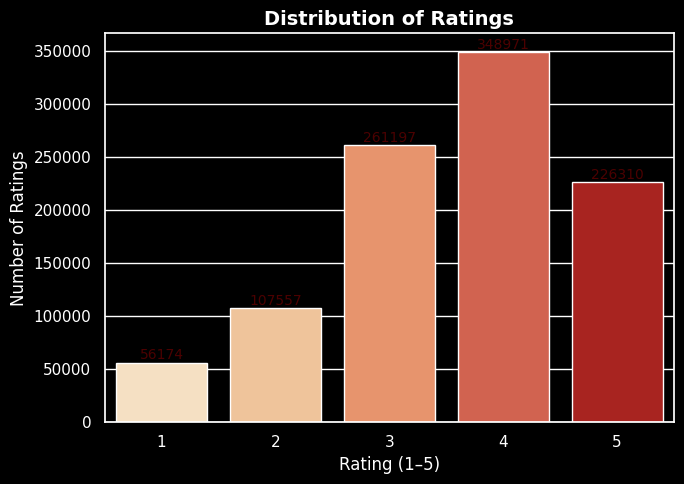

=== Descriptive Stats: Ratings ===


In [128]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Theme Setting ---
sns.set(style="darkgrid")  # พื้นหลังกริดดำ
plt.rcParams['figure.facecolor'] = 'black'   # พื้นหลังรอบกราฟ
plt.rcParams['axes.facecolor'] = 'black'     # พื้นหลังแกน
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.labelcolor'] = 'white'    # สีแกน X, Y
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'
plt.rcParams['text.color'] = 'white'

# --- Plot Distribution ---
plt.figure(figsize=(7,5))
sns.countplot(x="Rating", data=ratings, palette="OrRd")

# --- Title & Labels ---
plt.title("Distribution of Ratings", fontsize=14, fontweight='bold', color='white')
plt.xlabel("Rating (1–5)", fontsize=12, color='white')
plt.ylabel("Number of Ratings", fontsize=12, color='white')

# --- Add number labels on bars ---
for p in plt.gca().patches:
    plt.gca().text(
        p.get_x() + p.get_width()/2,
        p.get_height() + 200,
        int(p.get_height()),
        ha='center',
        va='bottom',
        fontsize=10,
        color='#4B0000'
    )

plt.tight_layout()
plt.show()

# --- Descriptive Statistics ---
print("=== Descriptive Stats: Ratings ===")
display(
    ratings["Rating"].describe()
    .to_frame()
    .style.background_gradient(cmap='OrRd')
    .set_caption("Descriptive Statistics for User Ratings (1–5)")
)


/tmp/ipython-input-1661597386.py:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




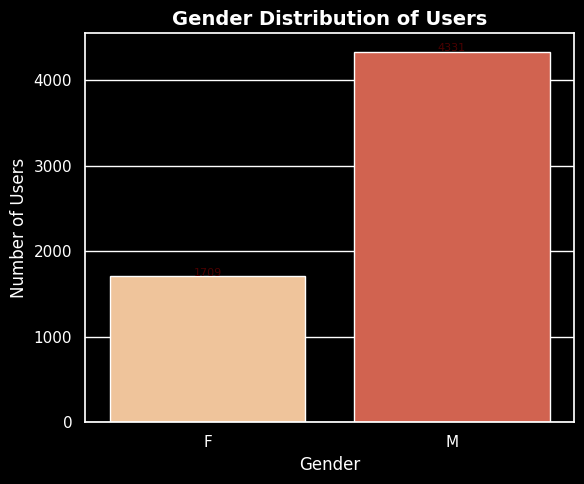

=== Gender Distribution (%) ===


In [130]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Theme Setting ---
sns.set(style="darkgrid")  # พื้นหลังกริดดำ
plt.rcParams['figure.facecolor'] = 'black'   # พื้นหลังรอบกราฟ
plt.rcParams['axes.facecolor'] = 'black'     # พื้นหลังแกน
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.labelcolor'] = 'white'    # สีแกน X, Y
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'
plt.rcParams['text.color'] = 'white'

# --- Plot Distribution ---
plt.figure(figsize=(6,5))
sns.countplot(x="Gender", data=users, palette="OrRd")

# --- Title & Labels ---
plt.title("Gender Distribution of Users", fontsize=14, fontweight='bold', color='white')
plt.xlabel("Gender", fontsize=12, color='white')
plt.ylabel("Number of Users", fontsize=12, color='white')

# --- Add number labels on bars ---
for p in plt.gca().patches:
    plt.gca().text(
        p.get_x() + p.get_width()/2,
        p.get_height() + 100,
        f"{int(p.get_height())}",
        ha='center',
        va='top',
        fontsize=8,
        color='#4B0000'
    )

plt.tight_layout()
plt.show()

# --- Display Percentage Table ---
print("=== Gender Distribution (%) ===")
gender_percent = (users["Gender"].value_counts(normalize=True) * 100).round(2)
display(
    gender_percent
    .to_frame("Percentage")
    .style.background_gradient(cmap="OrRd")
    .set_caption("Gender Distribution of Users (%)")
)


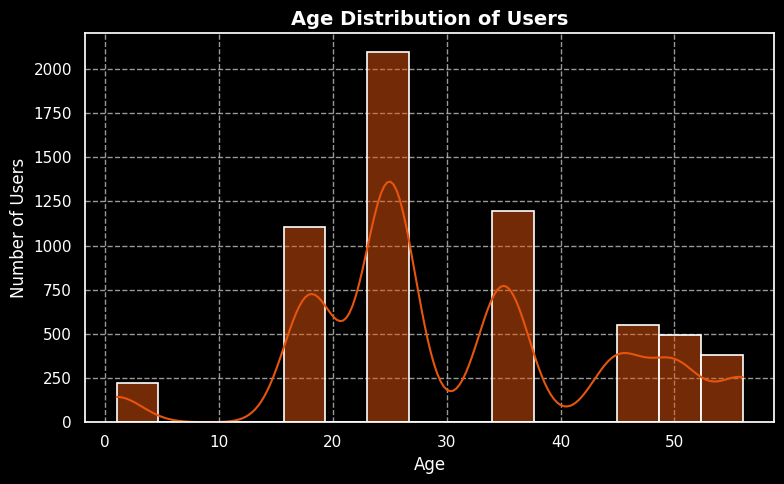

=== Descriptive Stats: Age (Users) ===


In [131]:
# ======================================================
# 🧩 SECTION 3: Age Distribution (Red–Orange Theme)
# ======================================================

import matplotlib.pyplot as plt
import seaborn as sns

# --- Theme Setting ---
sns.set(style="darkgrid")  # พื้นหลังกริดดำ
plt.rcParams['figure.facecolor'] = 'black'   # พื้นหลังรอบกราฟ
plt.rcParams['axes.facecolor'] = 'black'     # พื้นหลังแกน
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.labelcolor'] = 'white'    # สีแกน X, Y
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'
plt.rcParams['text.color'] = 'white'

# --- Plot Distribution ---
plt.figure(figsize=(8,5))
sns.histplot(users["Age"], bins=15, kde=True, color='#e6550d', edgecolor='white', linewidth=1.2)

# --- Title & Labels ---
plt.title("Age Distribution of Users", fontsize=14, fontweight='bold', color='white')
plt.xlabel("Age", fontsize=12)
plt.ylabel("Number of Users", fontsize=12)

# --- Styling ---
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

# --- Descriptive Statistics Table ---
print("=== Descriptive Stats: Age (Users) ===")
display(
    users["Age"]
    .describe()
    .to_frame()
    .style.background_gradient(cmap="OrRd")
    .set_caption("Descriptive Statistics for User Age")
)


/tmp/ipython-input-3822329221.py:52: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




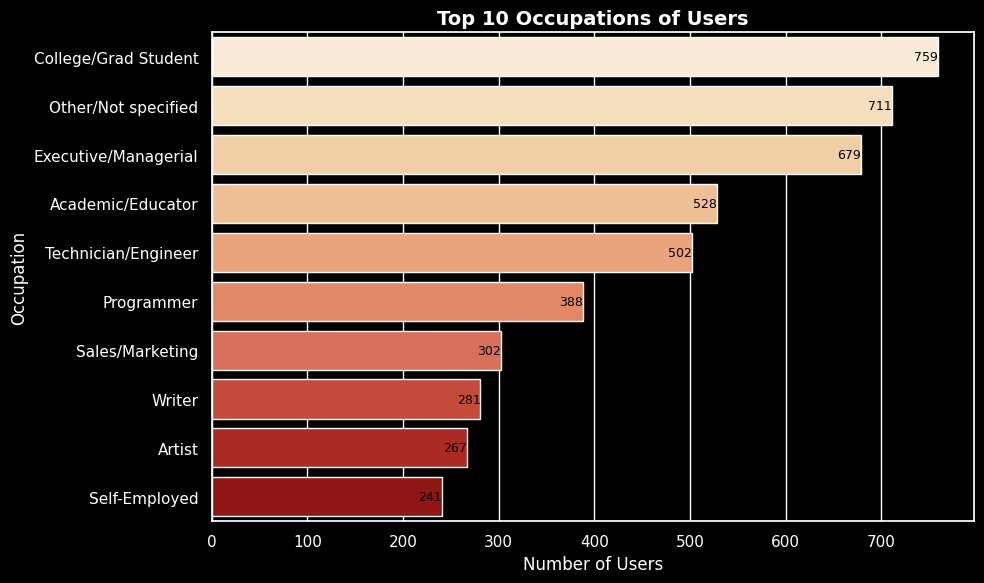

=== Occupation Distribution (Top 10) ===


In [140]:
# ======================================================
# 🧩 SECTION 4: Occupation Distribution (Red–Orange Theme)
# ======================================================

import matplotlib.pyplot as plt
import seaborn as sns

# --- Theme Setting ---
sns.set(style="darkgrid")  # พื้นหลังกริดดำ
plt.rcParams['figure.facecolor'] = 'black'   # พื้นหลังรอบกราฟ
plt.rcParams['axes.facecolor'] = 'black'     # พื้นหลังแกน
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.labelcolor'] = 'white'    # สีแกน X, Y
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'
plt.rcParams['text.color'] = 'white'

# --- Mapping Occupation IDs (ตาม MovieLens 1M) ---
occupation_labels = {
    0: "Other/Not specified",
    1: "Academic/Educator",
    2: "Artist",
    3: "Clerical/Admin",
    4: "College/Grad Student",
    5: "Customer Service",
    6: "Doctor/Health Care",
    7: "Executive/Managerial",
    8: "Farmer",
    9: "Homemaker",
    10: "K-12 Student",
    11: "Lawyer",
    12: "Programmer",
    13: "Retired",
    14: "Sales/Marketing",
    15: "Scientist",
    16: "Self-Employed",
    17: "Technician/Engineer",
    18: "Tradesman/Craftsman",
    19: "Unemployed",
    20: "Writer"
}

# --- Replace Occupation IDs with Names ---
users["Occupation_Name"] = users["Occupation"].map(occupation_labels)

# --- Calculate Top 10 Occupations ---
top_occ = users["Occupation_Name"].value_counts().head(10)

# --- Plot ---
plt.figure(figsize=(10,6))
sns.barplot(x=top_occ.values, y=top_occ.index, palette="OrRd")

# --- Titles & Labels ---
plt.title("Top 10 Occupations of Users", fontsize=14, fontweight='bold', color='white') # Added closing quote

# Continue with the rest of the code...
plt.xlabel("Number of Users", fontsize=12)
plt.ylabel("Occupation", fontsize=12)

# Add number labels on bars
for p in plt.gca().patches:
    plt.gca().text(
        p.get_width(),
        p.get_y() + p.get_height()/2,
        f'{int(p.get_width())}',
        ha='right',
        va='center',
        fontsize=9,
        color='black'
    )

plt.tight_layout()
plt.show()

# --- Display Count Table ---
print("=== Occupation Distribution (Top 10) ===")
display(
    top_occ
    .to_frame("Count")
    .style.background_gradient(cmap="OrRd")
    .set_caption("Top 10 User Occupations")
)

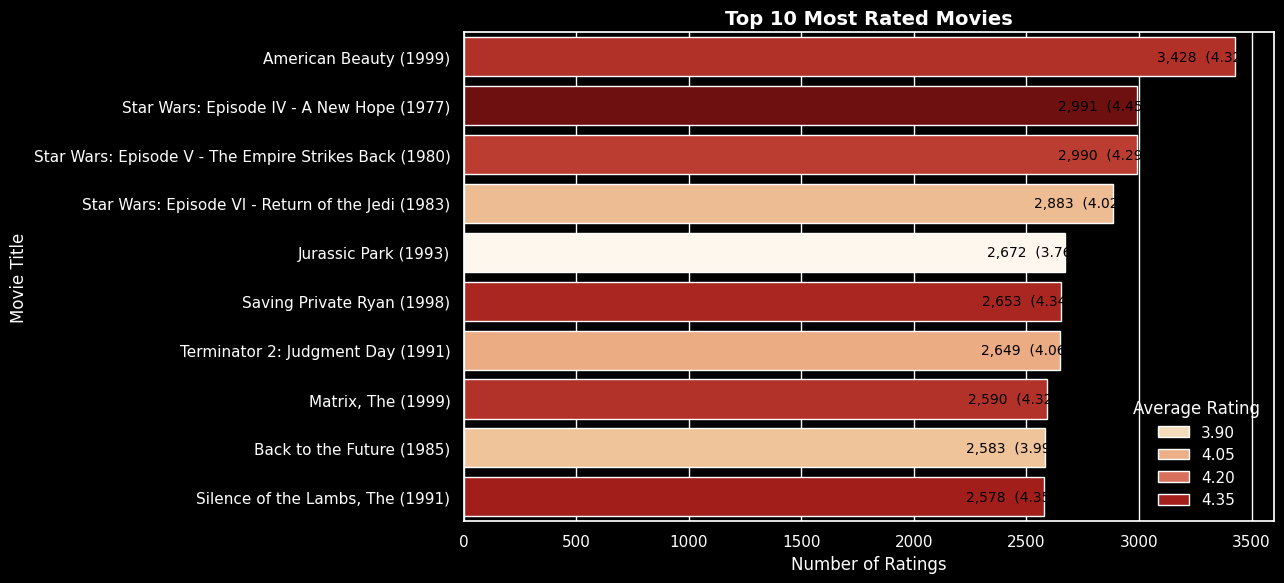

=== Top 10 Most Rated Movies (with Average Rating) ===


In [152]:
# ======================================================
# 🧩 SECTION 5: Movies with Most Ratings (Red–Orange Theme)
# ======================================================

import matplotlib.pyplot as plt
import seaborn as sns

# --- Theme Setting ---
sns.set(style="darkgrid")  # พื้นหลังกริดดำ
plt.rcParams['figure.facecolor'] = 'black'   # พื้นหลังรอบกราฟ
plt.rcParams['axes.facecolor'] = 'black'     # พื้นหลังแกน
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.labelcolor'] = 'white'    # สีแกน X, Y
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'
plt.rcParams['text.color'] = 'white'

# --- Prepare Data ---
movie_stats = ratings.groupby("MovieID")["Rating"].agg(["count", "mean"]).reset_index()
top_movies = movie_stats.sort_values("count", ascending=False).head(10)
top_movies = top_movies.merge(movies[["MovieID", "Title"]], on="MovieID", how="left")

# --- Plot ---
plt.figure(figsize=(13,6))
sns.barplot(
    x="count",
    y="Title",
    data=top_movies,
    hue="mean",
    dodge=False,
    palette="OrRd"
)

# --- Titles & Labels ---
plt.title("Top 10 Most Rated Movies", fontsize=14, fontweight='bold', color='white')
plt.xlabel("Number of Ratings", fontsize=12)
plt.ylabel("Movie Title", fontsize=12)
plt.legend(title="Average Rating", loc="lower right")

# --- Add value labels on bars ---
for i, (count, avg) in enumerate(zip(top_movies["count"], top_movies["mean"])):
    plt.text(count + 50, i, f"{count:,}  ({avg:.2f})",
             va='center',ha='right', fontsize=10, color='black')

plt.tight_layout()
plt.show()

# --- Display Table ---
print("=== Top 10 Most Rated Movies (with Average Rating) ===")
display(
    top_movies[["Title", "count", "mean"]]
    .rename(columns={
        "count": "Number of Ratings",
        "mean": "Average Rating"
    })
    .style.background_gradient(cmap="OrRd")
    .set_caption("Top 10 Most Rated Movies with Average Ratings")
)


/tmp/ipython-input-2969653160.py:29: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




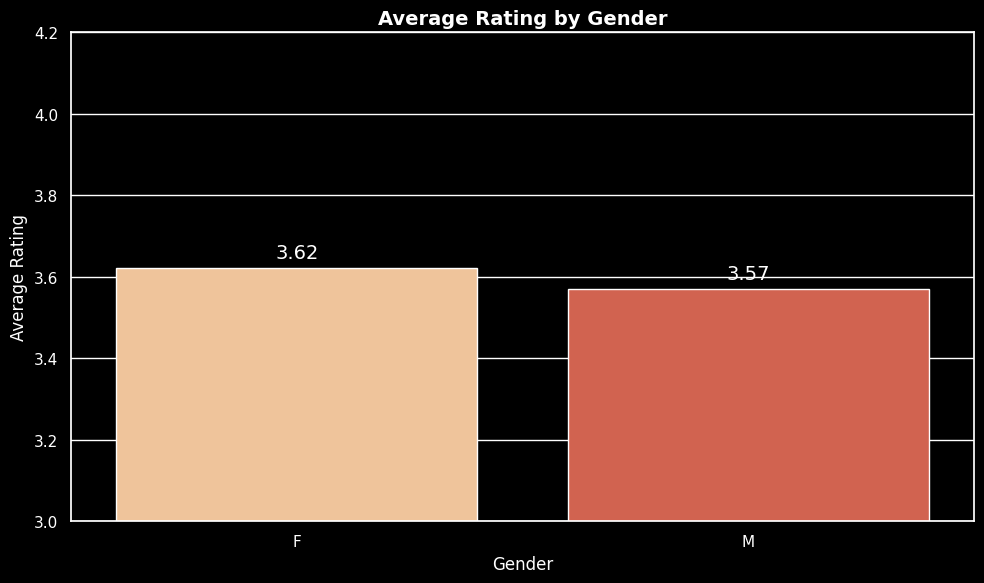

Gender    Rating
0      F  3.620366
1      M  3.568879

In [158]:
# 🧩 SECTION 6: Rating per Gender (Autumn Theme + Background #fffaf0, No Grid)
import matplotlib.pyplot as plt
import seaborn as sns

# ตั้งธีมสีโทนร้อน และใช้ whitegrid เพื่อให้มีเส้นกริด
sns.set(style="darkgrid")  # พื้นหลังกริดดำ
plt.rcParams['figure.facecolor'] = 'black'   # พื้นหลังรอบกราฟ
plt.rcParams['axes.facecolor'] = 'black'     # พื้นหลังแกน
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.labelcolor'] = 'white'    # สีแกน X, Y
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'
plt.rcParams['text.color'] = 'white'


# Merge ratings กับข้อมูลเพศ
# Assuming ratings and users dataframes are available
if 'ratings' not in locals() or ratings.empty or 'users' not in locals() or users.empty:
    print("Ratings or Users DataFrame is not available. Please run previous data loading steps.")
else:
    gender_rating = ratings.merge(users[["UserID", "Gender"]], on="UserID")

    # คำนวณค่าเฉลี่ย Rating ตามเพศ
    avg_rating_by_gender = gender_rating.groupby("Gender")["Rating"].mean().reset_index()

    # สร้าง Bar Chart
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(
        x="Gender",
        y="Rating",
        data=avg_rating_by_gender,
        order=avg_rating_by_gender['Gender'].tolist(),
        palette="OrRd", # Use OrRd palette
        hue=None
    )

    # ตั้ง title และ label
    plt.title("Average Rating by Gender", fontsize=14, fontweight='bold', color='white') # Set title color
    plt.xlabel("Gender", fontsize=12)
    plt.ylabel("Average Rating", fontsize=12)
    plt.ylim(3, 4.2)

    # Add value labels on bars
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', xytext=(0, 5), textcoords='offset points', color='white', fontsize=14) # Set label color and size


    plt.tight_layout()
    plt.show()

    # Display the average rating by gender
    display(avg_rating_by_gender)

In [65]:
# ======================================================
# 🧾 SECTION 7: Summary Overview
# ======================================================

print("=== SUMMARY OVERVIEW ===")
print(f"จำนวนผู้ใช้ทั้งหมด: {users['UserID'].nunique()}")
print(f"จำนวนภาพยนตร์ทั้งหมด: {movies['MovieID'].nunique()}")
print(f"จำนวนการให้คะแนนทั้งหมด: {ratings.shape[0]}")
print(f"คะแนนเฉลี่ยโดยรวม: {ratings['Rating'].mean():.2f}")


=== SUMMARY OVERVIEW ===
จำนวนผู้ใช้ทั้งหมด: 6040
จำนวนภาพยนตร์ทั้งหมด: 3883
จำนวนการให้คะแนนทั้งหมด: 1000209
คะแนนเฉลี่ยโดยรวม: 3.58


In [159]:
# ======================================================
# 📊 SECTION 1: DESCRIPTIVE STATISTICS (ฉบับสมบูรณ์โทนสีร้อน)
# ======================================================

# --- STEP 1: Import Libraries ---
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- STEP 2: Load Data ---
movies = '/content/drive/My Drive/ProjectBigData/ml-1m/movies.dat'
ratings = '/content/drive/My Drive/ProjectBigData/ml-1m/ratings.dat'
users = '/content/drive/My Drive/ProjectBigData/ml-1m/users.dat'

users = pd.read_csv(users, sep="::", engine='python', encoding='latin-1',
                    names=["UserID", "Gender", "Age", "Occupation", "Zip-code"])
ratings = pd.read_csv(ratings, sep="::", engine='python', encoding='latin-1',
                      names=["UserID", "MovieID", "Rating", "Timestamp"])
movies = pd.read_csv(movies, sep="::", engine='python', encoding='latin-1',
                     names=["MovieID", "Title", "Genres"])

# --- STEP 3: Theme Setting (โทนสีร้อน) ---
sns.set(style="darkgrid")  # พื้นหลังกริดดำ
plt.rcParams['figure.facecolor'] = 'black'   # พื้นหลังรอบกราฟ
plt.rcParams['axes.facecolor'] = 'black'     # พื้นหลังแกน
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.labelcolor'] = 'white'    # สีแกน X, Y
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'
plt.rcParams['text.color'] = 'white'

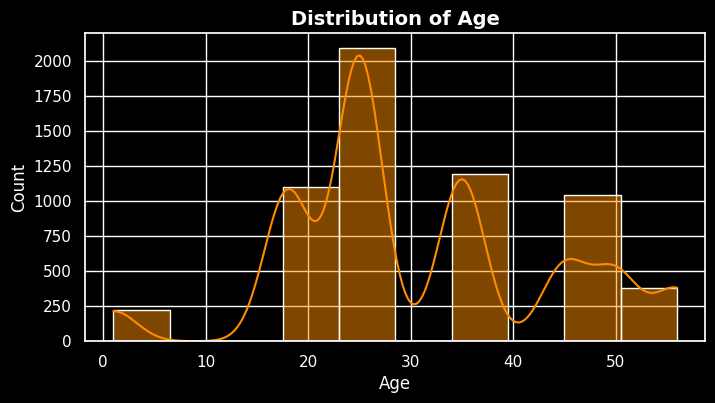

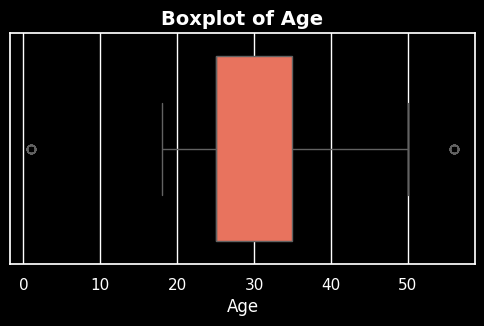

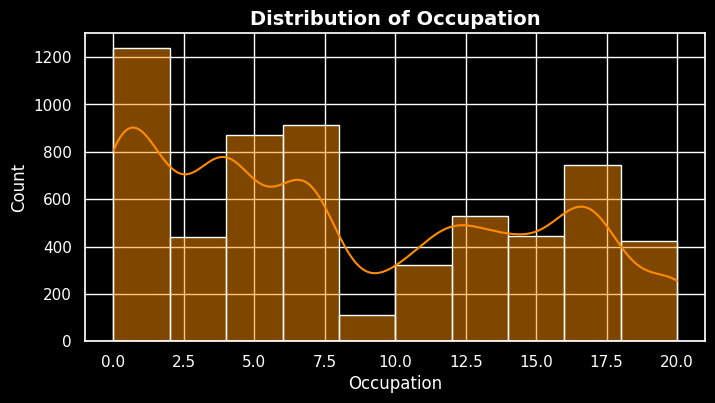

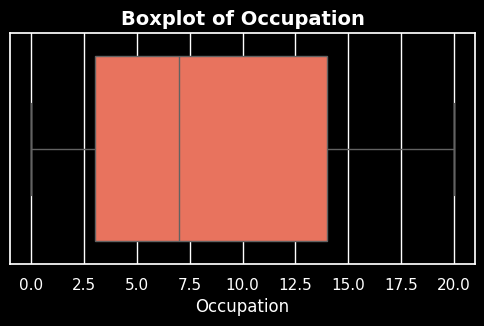

In [162]:
# ======================================================
# 1️⃣ Distribution & Summary for True Numerical Variables
# ======================================================

# คัดเฉพาะคอลัมน์ที่เป็นเชิงปริมาณจริง ๆ (เช่น อายุ, Occupation ถ้ามีความหมาย)
numeric_cols = [col for col in users.select_dtypes(include=['int64', 'float64']).columns
                if col not in ['UserID', 'Zip-code']]

for col in numeric_cols:
    # 🔶 กราฟ Distribution
    plt.figure(figsize=(8,4))
    sns.histplot(users[col], bins=10, kde=True, color='darkorange')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

    # 🔶 ตาราง Summary Statistics (เฉพาะคอลัมน์นั้น)
    desc = pd.DataFrame({
        'Mean': [users[col].mean()],
        'Median': [users[col].median()],
        'Std': [users[col].std()],
        'Min': [users[col].min()],
        'Max': [users[col].max()],
        'Skewness': [users[col].skew()],
        'Kurtosis': [users[col].kurtosis()]
    }, index=[col])
    display(desc.style.background_gradient(cmap='OrRd'))

    # 🔶 กราฟ Boxplot
    plt.figure(figsize=(6,3))
    sns.boxplot(x=users[col], color='tomato')
    plt.title(f'Boxplot of {col}')
    plt.show()


/tmp/ipython-input-2311108367.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




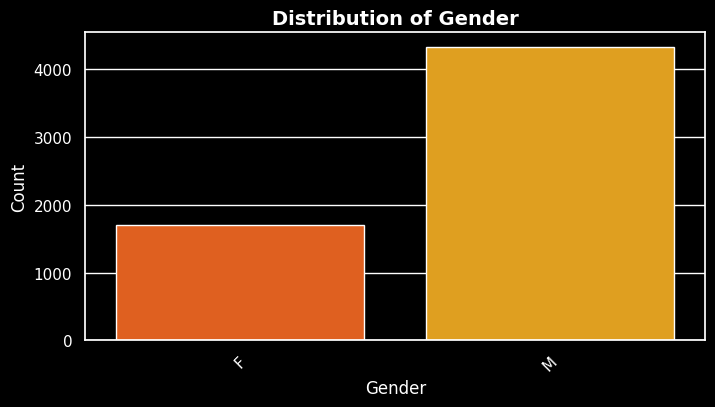

In [163]:
# ======================================================
# 2️⃣ Distribution & Summary for Categorical Variables
# ======================================================
cat_cols = [col for col in users.select_dtypes(include=['object']).columns
            if col not in ['Zip-code']]

for col in cat_cols:
    # 🔶 กราฟ Countplot
    plt.figure(figsize=(8,4))
    sns.countplot(data=users, x=col, palette='autumn')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

    # 🔶 ตาราง Count
    count_table = users[col].value_counts().to_frame('Count')
    display(count_table.style.background_gradient(cmap='YlOrBr'))

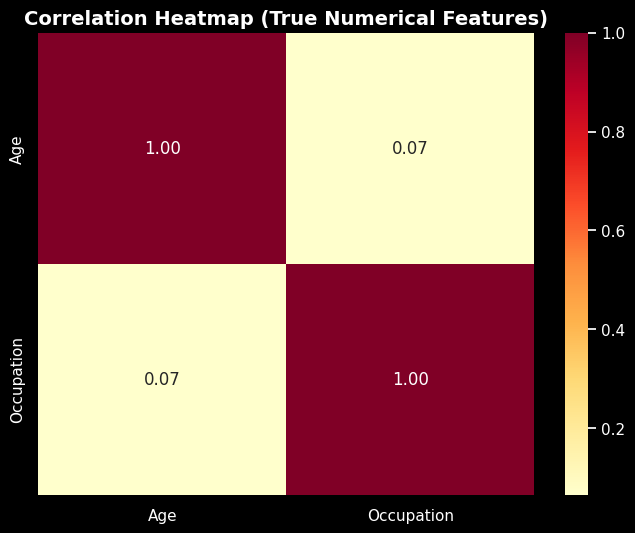

In [164]:
# ======================================================
# 3️⃣ Correlation Heatmap
# ======================================================
plt.figure(figsize=(8,6))
sns.heatmap(users[numeric_cols].corr(numeric_only=True), annot=True, cmap='YlOrRd', fmt='.2f')
plt.title('Correlation Heatmap (True Numerical Features)')
plt.show()

/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1513: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1513: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1615: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1615: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



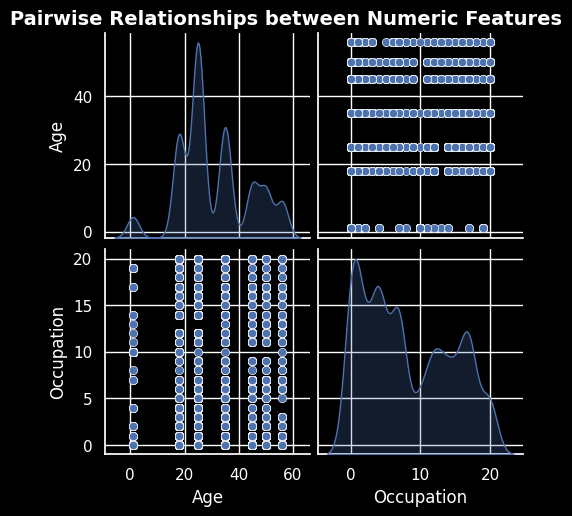

In [165]:
# ======================================================
# 🔟 Pairplot (Optional)
# ======================================================
if len(numeric_cols) > 1:
    sns.pairplot(users[numeric_cols], diag_kind='kde', palette='autumn')
    plt.suptitle('Pairwise Relationships between Numeric Features', y=1.02, fontsize=14, fontweight='bold')
    plt.show()

In [166]:
# ======================================================
# 1️⃣1️⃣ Summary Overview
# ======================================================
print("=== SUMMARY OVERVIEW ===")
print(f"Total Users: {users['UserID'].nunique()}")
print(f"Total Movies: {movies['MovieID'].nunique()}")
print(f"Total Ratings: {ratings.shape[0]}")
print(f"Overall Average Rating: {ratings['Rating'].mean():.2f}")

=== SUMMARY OVERVIEW ===
Total Users: 6040
Total Movies: 3883
Total Ratings: 1000209
Overall Average Rating: 3.58


In [172]:
import plotly.express as px

# สร้าง Sunburst chart
fig = px.sunburst(
    unique_title_counts,
    path=['Split_Genre_1', 'Split_Genre_2', 'Split_Genre_3'],
    values='Unique_Title_Count',
    title="Sunburst chart of unique titles by genre",
    color='Split_Genre_1',
    color_discrete_sequence=px.colors.qualitative.Set1
)

# ปรับ layout ให้พื้นหลังดำและข้อความสว่าง
fig.update_layout(
    paper_bgcolor='black',    # พื้นหลังรอบกราฟ
    plot_bgcolor='black',     # พื้นหลังกราฟ
    font=dict(color='white'), # สีตัวอักษร
    title=dict(font=dict(color='white'))
)

fig.show()


/tmp/ipython-input-3771220698.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




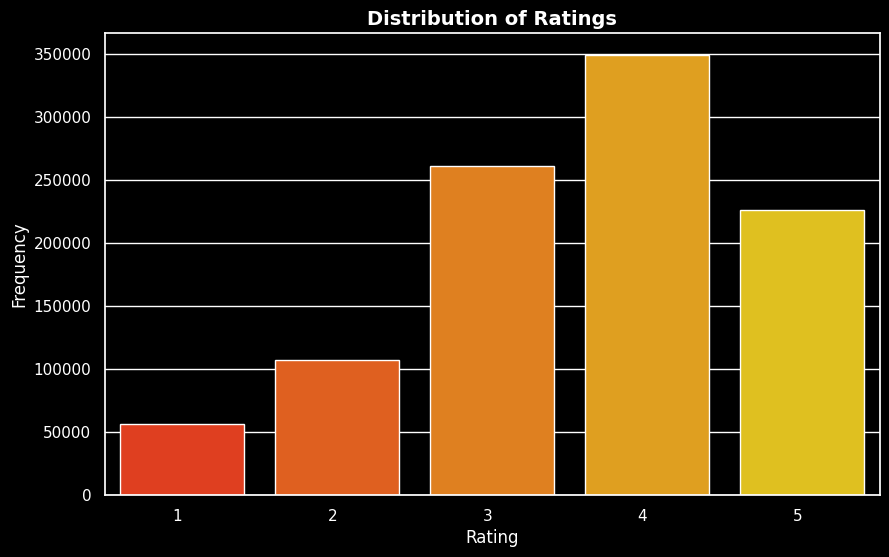

In [169]:
import matplotlib.pyplot as plt
import seaborn as sns

# กำหนดสีเฉดทองที่มี 20 เฉด
gold_colors = [mcolors.to_hex(f'#{int(255 - i * 10):02X}D4{int(i * 10):02X}') for i in range(20)]

# สร้างกราฟสำหรับ Rating (Bar Chart)
plt.figure(figsize=(10, 6))
sns.countplot(x='Rating', data=merged_df, palette='autumn')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.xticks(ha='right')
plt.show()

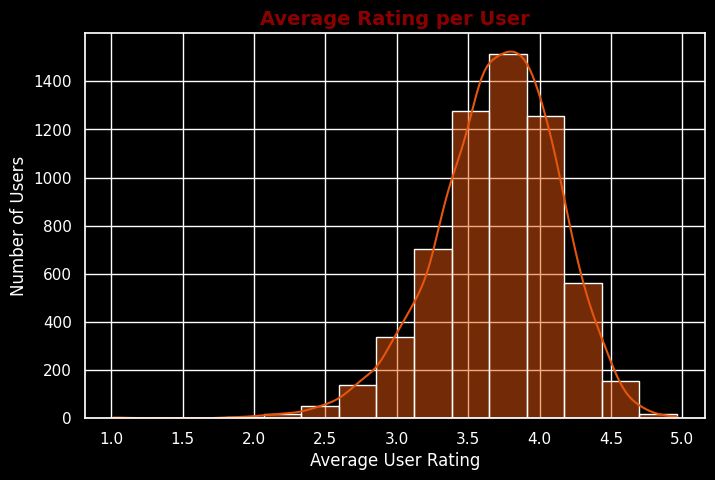

In [170]:
user_avg = ratings.groupby("UserID")["Rating"].mean().reset_index()

plt.figure(figsize=(8,5))
sns.histplot(user_avg["Rating"], bins=15, kde=True, color="#e6550d", edgecolor='white')
plt.title("Average Rating per User", fontsize=14, fontweight='bold', color='#8B0000')
plt.xlabel("Average User Rating")
plt.ylabel("Number of Users")
plt.show()

display(
    user_avg["Rating"].describe().to_frame()
    .style.background_gradient(cmap="OrRd")
    .set_caption("Descriptive Statistics: Average Rating per User")
)
